In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv
/kaggle/input/global-weather-repository/state.db


In [2]:
GlobalWeatherRepository=pd.read_csv(r'/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
GlobalWeatherRepository.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [3]:
GlobalWeatherRepository.describe().T

count          mean           std  \
latitude                      48331.0  1.914178e+01  2.448157e+01   
longitude                     48331.0  2.220684e+01  6.578773e+01   
last_updated_epoch            48331.0  1.726618e+09  6.262044e+06   
temperature_celsius           48331.0  2.309233e+01  9.123988e+00   
temperature_fahrenheit        48331.0  7.356765e+01  1.642310e+01   
wind_mph                      48331.0  8.288184e+00  9.908067e+00   
wind_kph                      48331.0  1.334259e+01  1.594426e+01   
wind_degree                   48331.0  1.710477e+02  1.032173e+02   
pressure_mb                   48331.0  1.013731e+03  7.062986e+00   
pressure_in                   48331.0  2.993487e+01  2.084661e-01   
precip_mm                     48331.0  1.460841e-01  6.351999e-01   
precip_in                     48331.0  5.561441e-03  2.509071e-02   
humidity                      48331.0  6.318953e+01  2.468524e+01   
cloud                         48331.0  4.003819e+01  3.372462e+01   
feels_like_celsius            48331.0  2.417686e+01  1.084419e+01   
feels_like_fahrenheit         48331.0  7.551199e+01  1.951765e+01   
visibility_km                 48331.0  9.630239e+00  2.494534e+00   
visibility_miles              48331.0  5.705675e+00  1.548874e+00   
uv_index                      48331.0  4.276106e+00  3.431089e+00   
gust_mph                      48331.0  1.198845e+01  1.095341e+01   
gust_kph                      48331.0  1.929568e+01  1.762833e+01   
air_quality_Carbon_Monoxide   48331.0  5.154636e+02  9.945543e+02   
air_quality_Ozone             48331.0  6.278494e+01  3.785055e+01   
air_quality_Nitrogen_dioxide  48331.0  1.394380e+01  2.567908e+01   
air_quality_Sulphur_dioxide   48331.0  1.053927e+01  5.202351e+01   
air_quality_PM2.5             48331.0  2.341323e+01  4.575711e+01   
air_quality_PM10              48331.0  4.605410e+01  1.401428e+02   
air_quality_us-epa-index      48331.0  1.645817e+00  9.581249e-01   
air_quality_gb-defra-index    48331.0  2.500403e+00  2.462803e+00   
moon_illumination             48331.0  4.974255e+01  3.506875e+01   

                                       min           25%           50%  \
latitude                     -4.130000e+01  3.750000e+00  1.725000e+01   
longitude                    -1.752000e+02 -6.250000e+00  2.332000e+01   
last_updated_epoch            1.715849e+09  1.721134e+09  1.726656e+09   
temperature_celsius          -2.480000e+01  1.830000e+01  2.530000e+01   
temperature_fahrenheit       -1.260000e+01  6.490000e+01  7.750000e+01   
wind_mph                      2.200000e+00  4.000000e+00  6.900000e+00   
wind_kph                      3.600000e+00  6.500000e+00  1.120000e+01   
wind_degree                   1.000000e+00  8.250000e+01  1.640000e+02   
pressure_mb                   9.710000e+02  1.010000e+03  1.013000e+03   
pressure_in                   2.867000e+01  2.983000e+01  2.991000e+01   
precip_mm                     0.000000e+00  0.000000e+00  0.000000e+00   
precip_in                     0.000000e+00  0.000000e+00  0.000000e+00   
humidity                      2.000000e+00  4.500000e+01  6.800000e+01   
cloud                         0.000000e+00  4.000000e+00  3.100000e+01   
feels_like_celsius           -3.220000e+01  1.830000e+01  2.650000e+01   
feels_like_fahrenheit        -2.600000e+01  6.490000e+01  7.970000e+01   
visibility_km                 0.000000e+00  1.000000e+01  1.000000e+01   
visibility_miles              0.000000e+00  6.000000e+00  6.000000e+00   
uv_index                      0.000000e+00  1.000000e+00  4.800000e+00   
gust_mph                      2.200000e+00  6.700000e+00  1.060000e+01   
gust_kph                      3.600000e+00  1.080000e+01  1.700000e+01   
air_quality_Carbon_Monoxide  -9.999000e+03  2.183000e+02  3.104000e+02   
air_quality_Ozone             0.000000e+00  3.700000e+01  5.900000e+01   
air_quality_Nitrogen_dioxide  0.000000e+00  8.000000e-01  2.960000e+00   
air_quality_Sulphur_dioxide  -9.999000e+03

In [4]:
GlobalWeatherRepository.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  int64  
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   temperature_fahrenheit        48331 non-null  float64
 9   condition_text                48331 non-null  object 
 10  wind_mph                      48331 non-null  float64
 11  wind_kph                      48331 non-null  float64
 12  wind_degree                   48331 non-null  int64  
 13  w

at first we can delete the repeated features like speed in kph and mph and use just one

we will use use **Metric Systems of Measurement** for familiarity 

In [5]:
columns_repeated = ['temperature_fahrenheit' , 'wind_mph' , 'pressure_in' , 'precip_in' , 'feels_like_fahrenheit' , 'feels_like_fahrenheit',
                    'visibility_miles' , 'gust_mph' ]
GlobalWeatherRepository.drop(columns=columns_repeated , inplace = True)

In [6]:
GlobalWeatherRepository.describe().T

count          mean           std  \
latitude                      48331.0  1.914178e+01  2.448157e+01   
longitude                     48331.0  2.220684e+01  6.578773e+01   
last_updated_epoch            48331.0  1.726618e+09  6.262044e+06   
temperature_celsius           48331.0  2.309233e+01  9.123988e+00   
wind_kph                      48331.0  1.334259e+01  1.594426e+01   
wind_degree                   48331.0  1.710477e+02  1.032173e+02   
pressure_mb                   48331.0  1.013731e+03  7.062986e+00   
precip_mm                     48331.0  1.460841e-01  6.351999e-01   
humidity                      48331.0  6.318953e+01  2.468524e+01   
cloud                         48331.0  4.003819e+01  3.372462e+01   
feels_like_celsius            48331.0  2.417686e+01  1.084419e+01   
visibility_km                 48331.0  9.630239e+00  2.494534e+00   
uv_index                      48331.0  4.276106e+00  3.431089e+00   
gust_kph                      48331.0  1.929568e+01  1.762833e+01   
air_quality_Carbon_Monoxide   48331.0  5.154636e+02  9.945543e+02   
air_quality_Ozone             48331.0  6.278494e+01  3.785055e+01   
air_quality_Nitrogen_dioxide  48331.0  1.394380e+01  2.567908e+01   
air_quality_Sulphur_dioxide   48331.0  1.053927e+01  5.202351e+01   
air_quality_PM2.5             48331.0  2.341323e+01  4.575711e+01   
air_quality_PM10              48331.0  4.605410e+01  1.401428e+02   
air_quality_us-epa-index      48331.0  1.645817e+00  9.581249e-01   
air_quality_gb-defra-index    48331.0  2.500403e+00  2.462803e+00   
moon_illumination             48331.0  4.974255e+01  3.506875e+01   

                                       min           25%           50%  \
latitude                     -4.130000e+01  3.750000e+00  1.725000e+01   
longitude                    -1.752000e+02 -6.250000e+00  2.332000e+01   
last_updated_epoch            1.715849e+09  1.721134e+09  1.726656e+09   
temperature_celsius          -2.480000e+01  1.830000e+01  2.530000e+01   
wind_kph                      3.600000e+00  6.500000e+00  1.120000e+01   
wind_degree                   1.000000e+00  8.250000e+01  1.640000e+02   
pressure_mb                   9.710000e+02  1.010000e+03  1.013000e+03   
precip_mm                     0.000000e+00  0.000000e+00  0.000000e+00   
humidity                      2.000000e+00  4.500000e+01  6.800000e+01   
cloud                         0.000000e+00  4.000000e+00  3.100000e+01   
feels_like_celsius           -3.220000e+01  1.830000e+01  2.650000e+01   
visibility_km                 0.000000e+00  1.000000e+01  1.000000e+01   
uv_index                      0.000000e+00  1.000000e+00  4.800000e+00   
gust_kph                      3.600000e+00  1.080000e+01  1.700000e+01   
air_quality_Carbon_Monoxide  -9.999000e+03  2.183000e+02  3.104000e+02   
air_quality_Ozone             0.000000e+00  3.700000e+01  5.900000e+01   
air_quality_Nitrogen_dioxide  0.000000e+00  8.000000e-01  2.960000e+00   
air_quality_Sulphur_dioxide  -9.999000e+03  7.000000e-01  2.035000e+00   
air_quality_PM2.5             1.850000e-01  4.700000e+00  1.184000e+01   
air_quality_PM10              1.850000e-01  7.600000e+00  1.850000e+01   
air_quality_us-epa-index      1.000000e+00  1.000000e+00  1.000000e+00   
air_quality_gb-defra-index    1.000000e+00  1.000000e+00  1.000000e+00   
moon_illumination             0.000000e+00  1.500000e+01  5.000000e+01   

                                       75%           max  
latitude                      4.040000e+01  6.415000e+01  
longitude                     5.058000e+01  1.792200e+02  
last_updated_epoch            1.732007e+09  1.737373e+09  
temperature_celsius           2.900000e+01  4.920000e+01  
wind_kph                      1.870000e+01  2.963200e+03  
wind_degree                   2.590000e+02  3.600000e+02  
pressure_mb                   1.017000e+03  1.080000e+03  
precip_mm                     3.000000e-02  4.224000e+01  
humidity                      8.300000e+01  1.000000e+02  
cloud   

In [7]:
GlobalWeatherRepository.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  int64  
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   condition_text                48331 non-null  object 
 9   wind_kph                      48331 non-null  float64
 10  wind_degree                   48331 non-null  int64  
 11  wind_direction                48331 non-null  object 
 12  pressure_mb                   48331 non-null  float64
 13  p

# handle missing values

In [8]:
GlobalWeatherRepository.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
condition_text                  0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
precip_mm                       0
humidity                        0
cloud                           0
feels_like_celsius              0
visibility_km                   0
uv_index                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset        

as we can see we dont have any missing values

# handle outliers

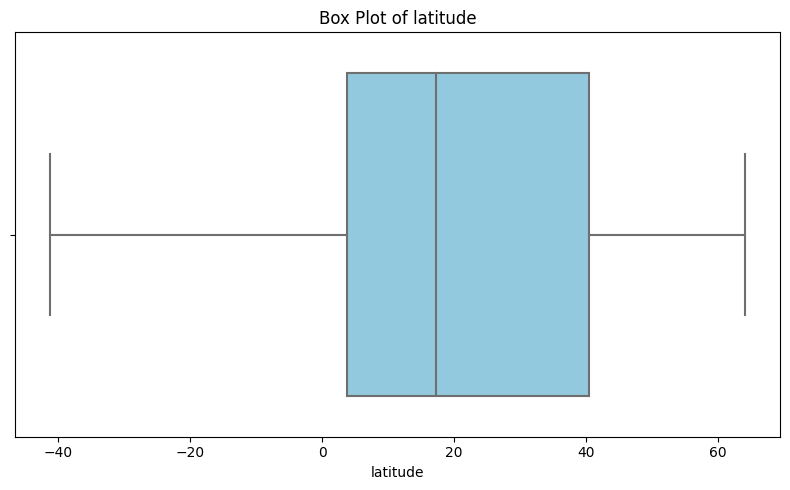

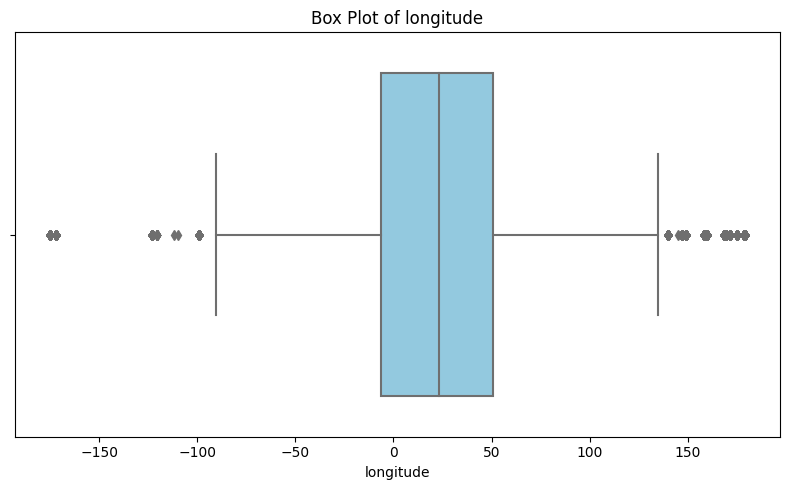

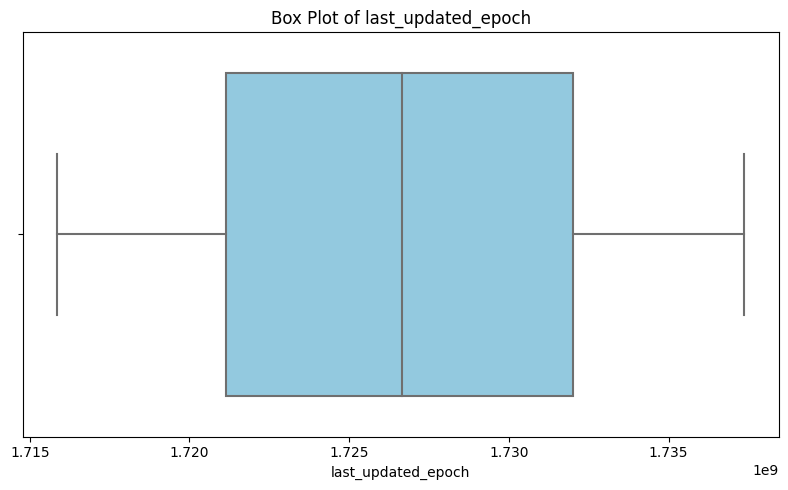

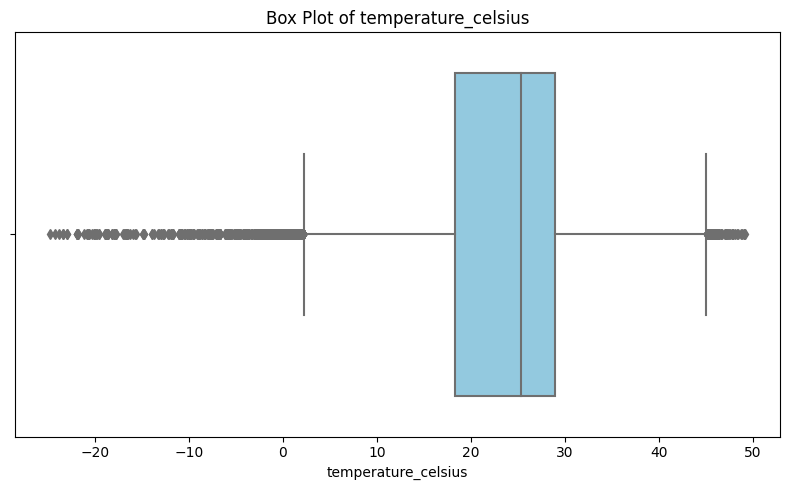

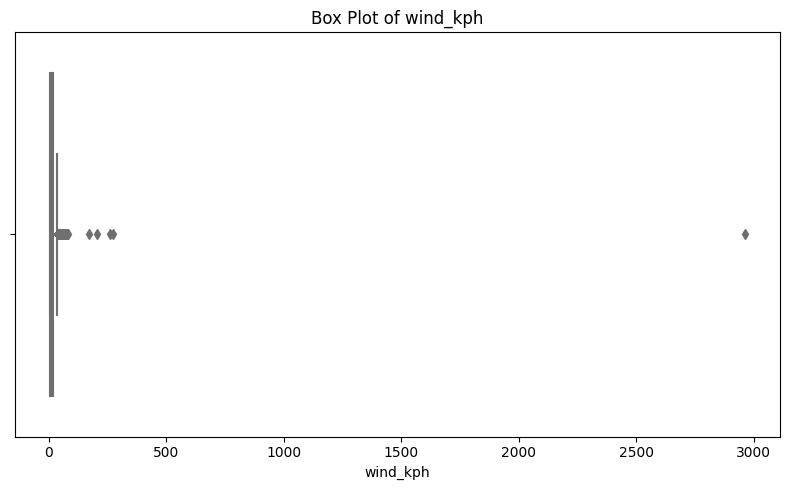

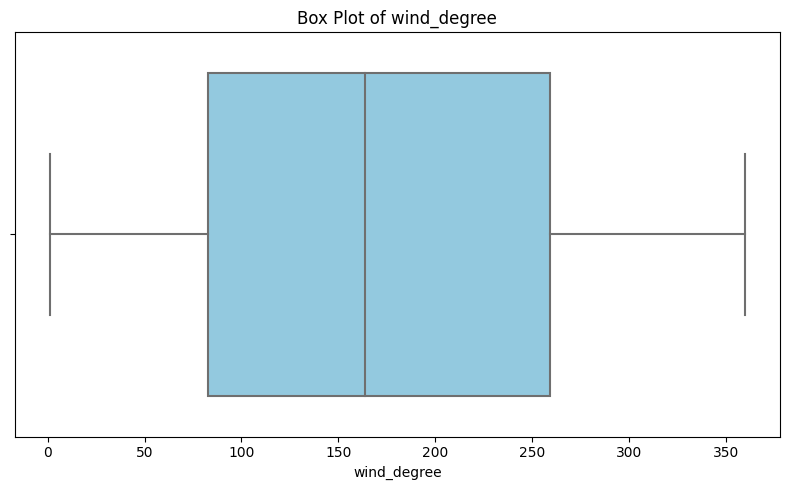

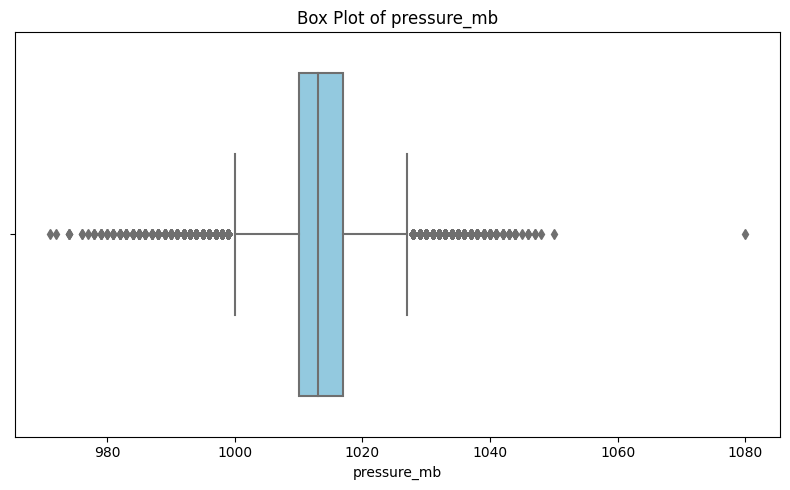

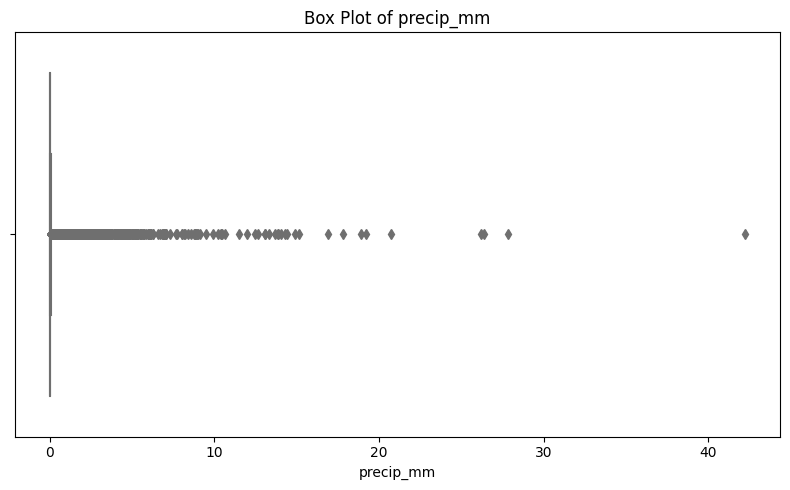

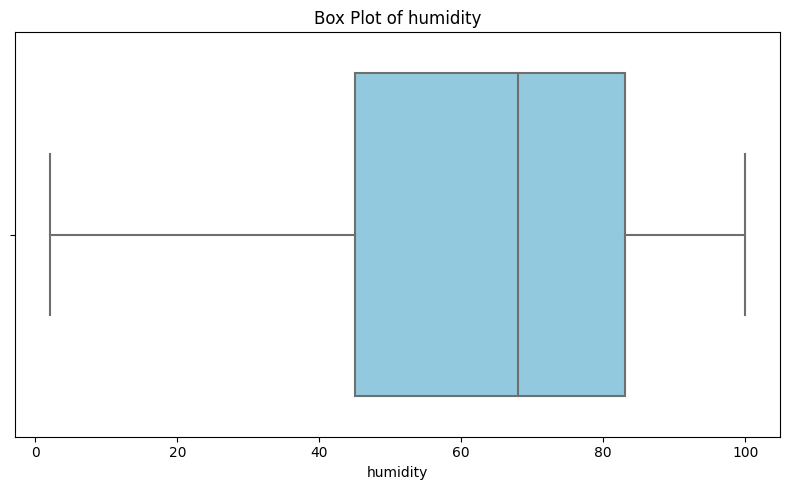

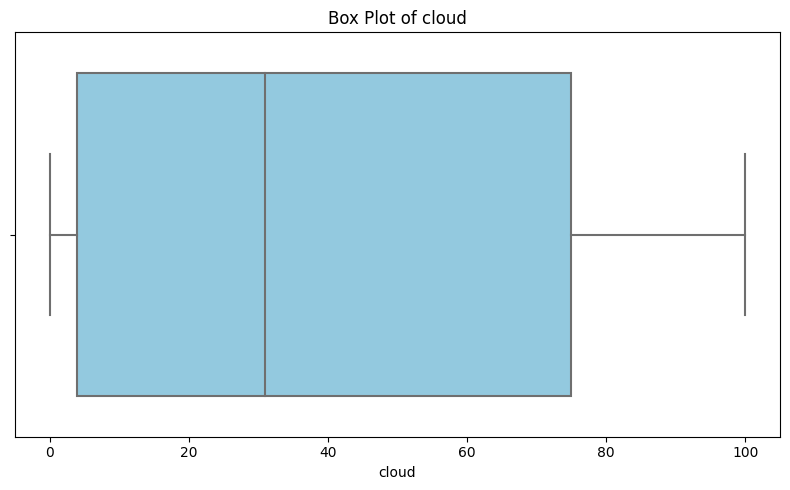

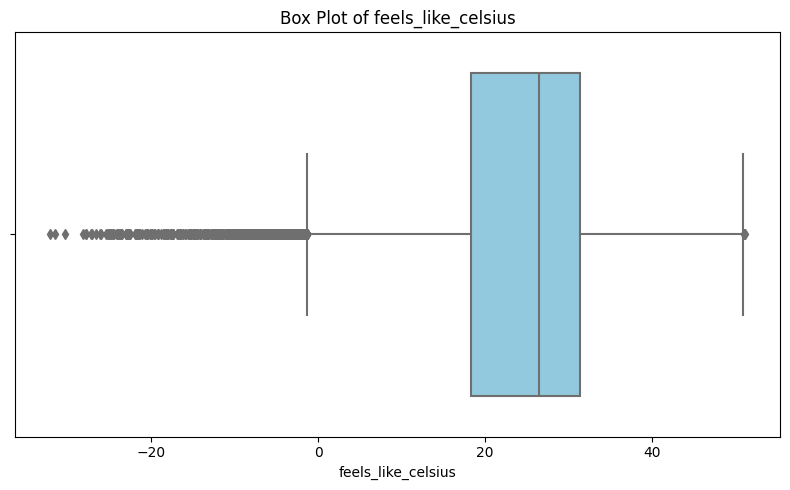

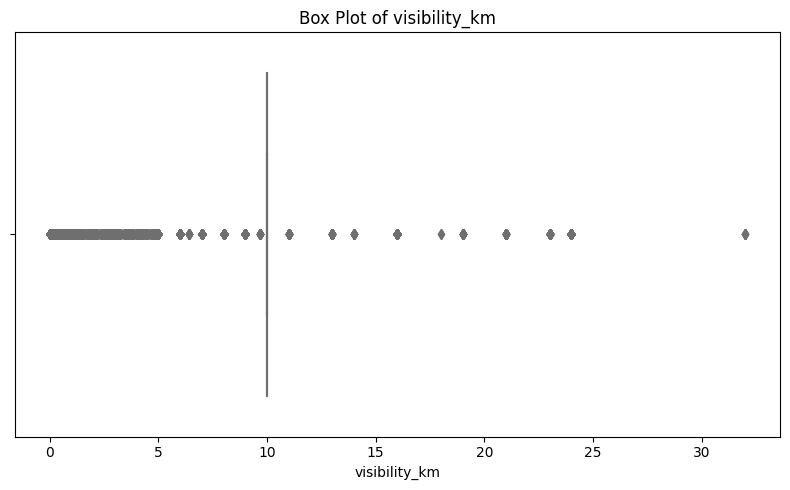

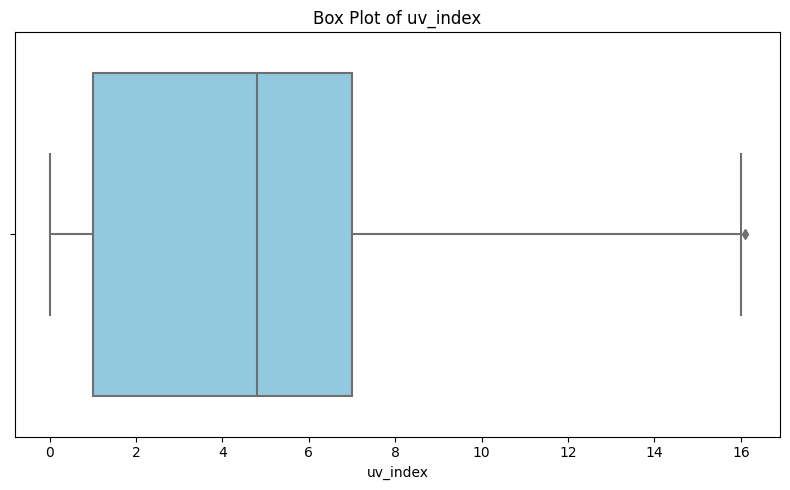

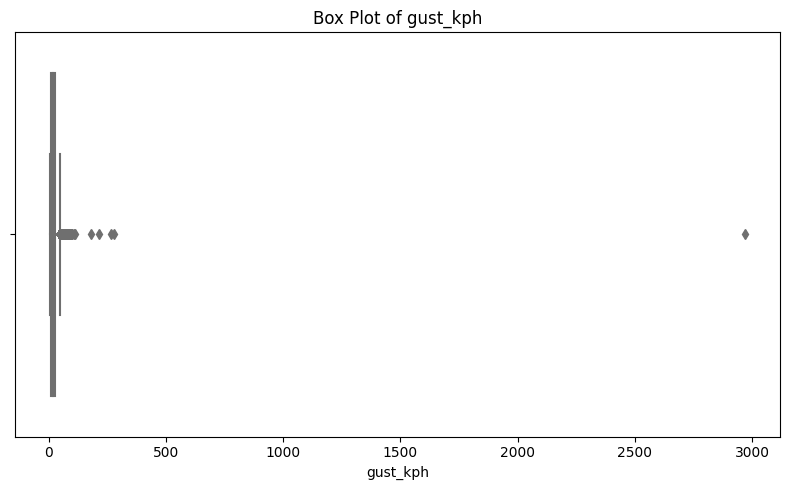

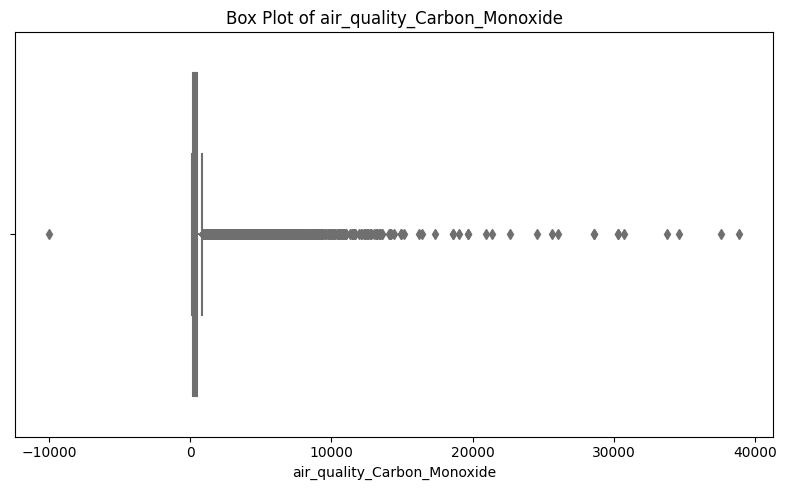

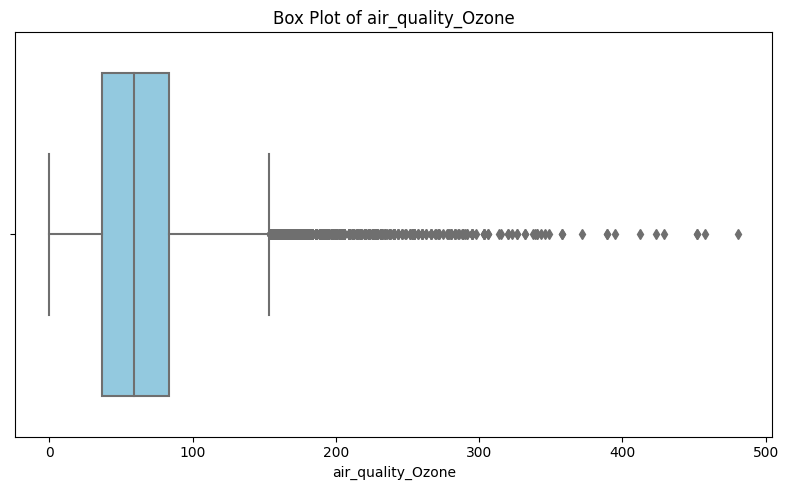

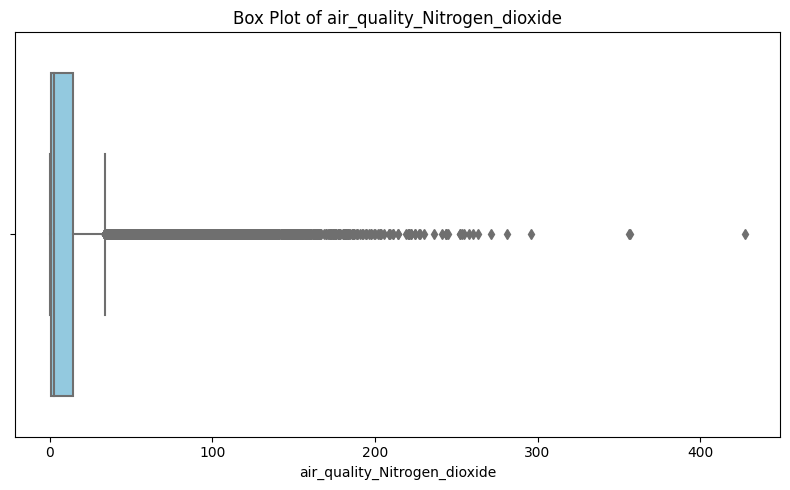

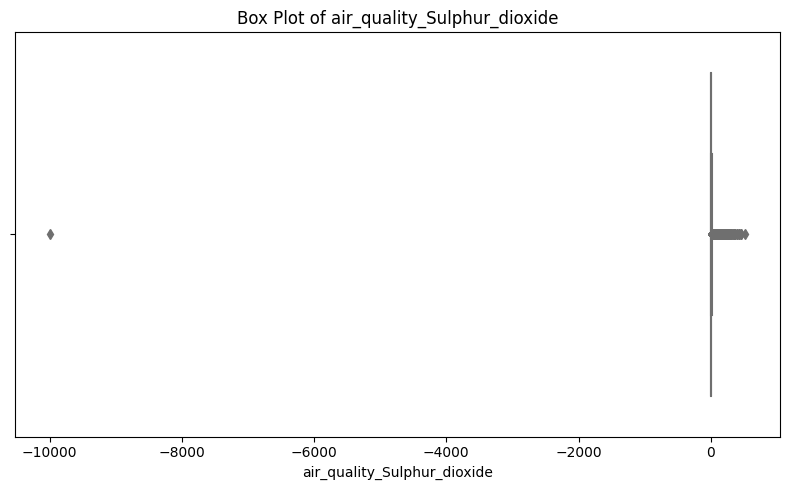

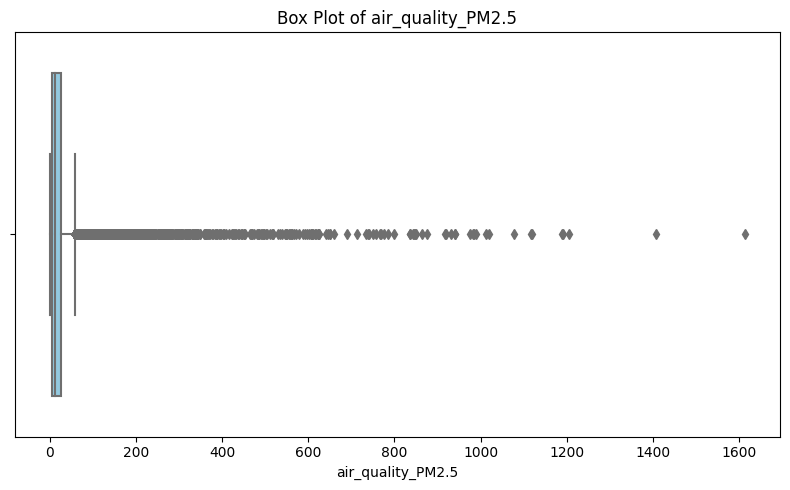

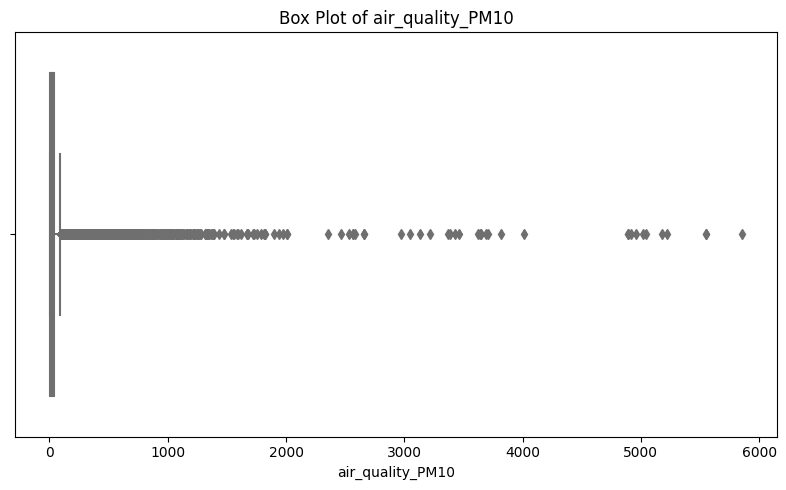

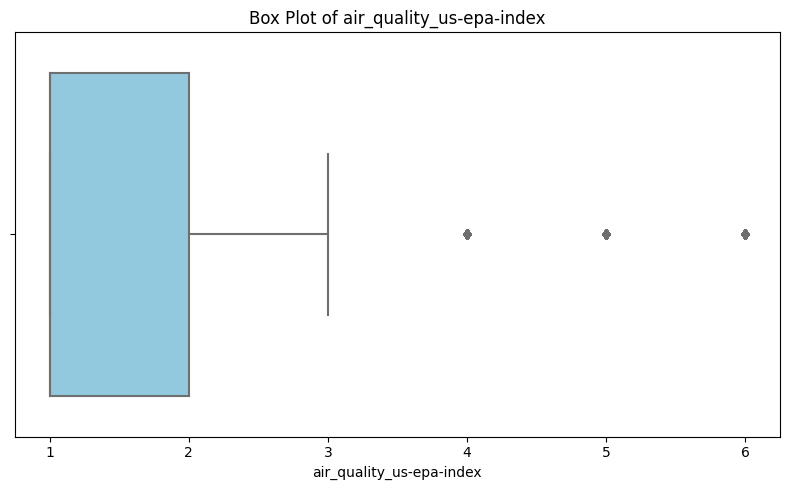

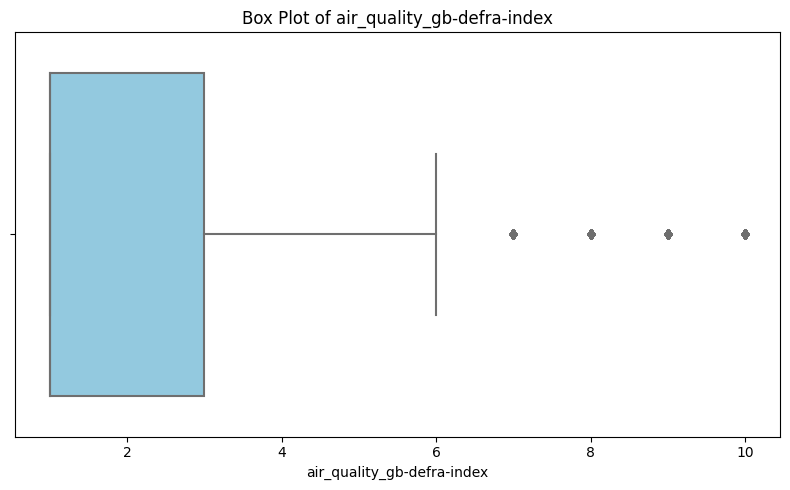

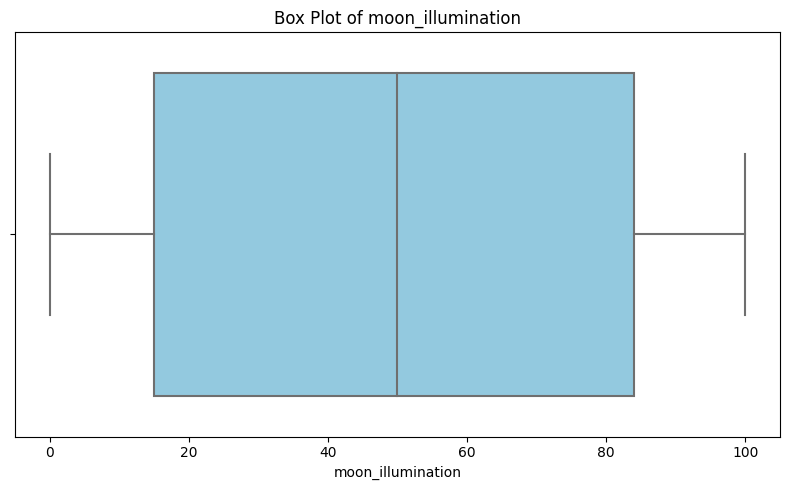

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot box plots for all numeric features
def plot_boxplots(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numeric_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

plot_boxplots(GlobalWeatherRepository)


now we check the number of outliers for each feature

In [10]:
import pandas as pd

# Function to count outliers using the IQR method
def count_outliers(df):
    outlier_counts = {}
    
    # Select only numeric columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numeric_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
    
    # Convert the result to a DataFrame for better readability
    outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Feature', 'Outlier Count'])
    return outlier_df.sort_values(by='Outlier Count', ascending=False)


In [11]:
outlier_report = count_outliers(GlobalWeatherRepository)
print(outlier_report)

                         Feature  Outlier Count
7                      precip_mm           9256
11                 visibility_km           8839
17   air_quality_Sulphur_dioxide           7165
16  air_quality_Nitrogen_dioxide           6337
19              air_quality_PM10           4942
21    air_quality_gb-defra-index           4572
14   air_quality_Carbon_Monoxide           4480
18             air_quality_PM2.5           4048
1                      longitude           3718
20      air_quality_us-epa-index           3306
6                    pressure_mb           3239
3            temperature_celsius           1590
10            feels_like_celsius           1251
13                      gust_kph            966
15             air_quality_Ozone            961
4                       wind_kph            618
12                      uv_index              1
0                       latitude              0
9                          cloud              0
8                       humidity        

our data consist of 47552 row so having 9161 of outliers at most

we cant impute them with other values as it would be wrong information specially for weather forecasting 

we can delete the rows with most affecting outliers 

we will delete the rows with exceeding outliers 


we will check the model accuracy first then determine what to do with outliers 

model results best score was 0.77 and the highest affecting feature on that bad results was precip_mm so we need to address our outliers again 

instead of removing our outliers we will deal wih each feature for it self according to the data type and disturbution

**note**

After tesing deleting outliers was a bad idea as the best score we got was 77% 

dealing with every feature on itself had no better results as we tried appling standard scalar on air quality features , log tranformation for precip_mm and winsorize for visibility and finally z score for pressure **by ChatGPT** and we got the same results as before 

after testing the model without addressing the outliers and focusing on predicting temp , presuure and humidity we got 91% accuracy which is quite good results 


we will still try to figure how to handle such inbalanced data without changing the data itself to keep the most out of it then try again

First lets check our values

In [12]:
for column in GlobalWeatherRepository.columns:
    print(f"Value counts for column '{column}':")
    print(GlobalWeatherRepository[column].value_counts())
    print("="*50)  # Separator for readability


Value counts for column 'country':
country
Bulgaria                            530
Indonesia                           499
Madagascar                          496
Iran                                496
Sudan                               496
                                   ... 
Kosovo                                1
Libya                                 1
Lao People's Democratic Republic      1
Colombia                              1
Jemen                                 1
Name: count, Length: 210, dtype: int64
Value counts for column 'location_name':
location_name
Kabul               249
Vatican City        249
Nairobi             249
Amman               249
Tokyo               249
                   ... 
Tripoli               1
Male                  1
Ho Chi Minh City      1
Bali                  1
Kingston              1
Name: count, Length: 248, dtype: int64
Value counts for column 'latitude':
latitude
41.90    387
12.15    386
40.40    386
39.93    276
53.90    249
        ..

In [13]:
import pandas as pd

# Function to count and remove outliers using the IQR method
def remove_outliers(df):
    # Select only numeric columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Initialize mask for all data
    mask = pd.Series(True, index=df.index)
    
    for column in numeric_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 10 * IQR
        upper_bound = Q3 + 10 * IQR
        
        # Update mask to exclude outliers
        mask &= (df[column] >= lower_bound) & (df[column] <= upper_bound)
    
    # Filter the DataFrame to remove outliers
    cleaned_df = df[mask].reset_index(drop=True)
    removed_rows = df.shape[0] - cleaned_df.shape[0]
    
    print(f"Removed {removed_rows} rows containing outliers.")
    return cleaned_df


lets deal with precip_mm which has  the highest number of outliers and most affecting our model results absabs

we will try Log Transformation to compresses extreme values and spreads low values as the data is heavely inbalanced

now lets see our **outliers report** again

In [14]:
outlier_report = count_outliers(GlobalWeatherRepository)
print(outlier_report)

                         Feature  Outlier Count
7                      precip_mm           9256
11                 visibility_km           8839
17   air_quality_Sulphur_dioxide           7165
16  air_quality_Nitrogen_dioxide           6337
19              air_quality_PM10           4942
21    air_quality_gb-defra-index           4572
14   air_quality_Carbon_Monoxide           4480
18             air_quality_PM2.5           4048
1                      longitude           3718
20      air_quality_us-epa-index           3306
6                    pressure_mb           3239
3            temperature_celsius           1590
10            feels_like_celsius           1251
13                      gust_kph            966
15             air_quality_Ozone            961
4                       wind_kph            618
12                      uv_index              1
0                       latitude              0
9                          cloud              0
8                       humidity        

# normalize our data 

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Function to normalize data
def normalize_data(df, method='minmax'):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    df_normalized = df.copy()
    
    if method == 'minmax':
        scaler = MinMaxScaler()
        df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])
    elif method == 'zscore':
        scaler = StandardScaler()
        df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])
    elif method == 'robust':
        scaler = RobustScaler()
        df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])
    else:
        raise ValueError("Invalid method. Choose from 'minmax', 'zscore', or 'robust'.")
    
    return df_normalized

In [16]:
normalized_df = normalize_data(GlobalWeatherRepository, method='minmax')  # Options: 'minmax', 'zscore', 'robust'
print(normalized_df.head())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul  0.719014   0.689521      Asia/Kabul   
1      Albania            Tirana  0.783594   0.550251   Europe/Tirane   
2      Algeria           Algiers  0.740256   0.502934  Africa/Algiers   
3      Andorra  Andorra La Vella  0.794689   0.498617  Europe/Andorra   
4       Angola            Luanda  0.307824   0.531657   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius condition_text  \
0                 0.0  2024-05-16 13:15             0.694595  Partly Cloudy   
1                 0.0  2024-05-16 10:45             0.591892  Partly cloudy   
2                 0.0  2024-05-16 09:45             0.645946          Sunny   
3                 0.0  2024-05-16 10:45             0.420270  Light drizzle   
4                 0.0  2024-05-16 09:45             0.686486  Partly cloudy   

   wind_kph  ...  air_quality_PM2.5 air_quality_PM10  \
0  0.003277  ...           0.0

In [17]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  float64
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   condition_text                48331 non-null  object 
 9   wind_kph                      48331 non-null  float64
 10  wind_degree                   48331 non-null  float64
 11  wind_direction                48331 non-null  object 
 12  pressure_mb                   48331 non-null  float64
 13  p

In [18]:
normalized_df.describe().T

count      mean       std  min       25%  \
latitude                      48331.0  0.573180  0.232163  0.0  0.427217   
longitude                     48331.0  0.556986  0.185621  0.0  0.476694   
last_updated_epoch            48331.0  0.500316  0.290940  0.0  0.245536   
temperature_celsius           48331.0  0.647194  0.123297  0.0  0.582432   
wind_kph                      48331.0  0.003292  0.005387  0.0  0.000980   
wind_degree                   48331.0  0.473670  0.287513  0.0  0.227019   
pressure_mb                   48331.0  0.392027  0.064798  0.0  0.357798   
precip_mm                     48331.0  0.003458  0.015038  0.0  0.000000   
humidity                      48331.0  0.624383  0.251890  0.0  0.438776   
cloud                         48331.0  0.400382  0.337246  0.0  0.040000   
feels_like_celsius            48331.0  0.675982  0.130026  0.0  0.605516   
visibility_km                 48331.0  0.300945  0.077954  0.0  0.312500   
uv_index                      48331.0  0.265597  0.213111  0.0  0.062112   
gust_kph                      48331.0  0.005290  0.005942  0.0  0.002427   
air_quality_Carbon_Monoxide   48331.0  0.215115  0.020348  0.0  0.209035   
air_quality_Ozone             48331.0  0.130611  0.078740  0.0  0.076971   
air_quality_Nitrogen_dioxide  48331.0  0.032602  0.060040  0.0  0.001870   
air_quality_Sulphur_dioxide   48331.0  0.951447  0.004945  0.0  0.950512   
air_quality_PM2.5             48331.0  0.014392  0.028352  0.0  0.002798   
air_quality_PM10              48331.0  0.007830  0.023924  0.0  0.001266   
air_quality_us-epa-index      48331.0  0.129163  0.191625  0.0  0.000000   
air_quality_gb-defra-index    48331.0  0.166711  0.273645  0.0  0.000000   
moon_illumination             48331.0  0.497425  0.350687  0.0  0.150000   

                                   50%       75%  max  
latitude                      0.555239  0.774775  1.0  
longitude                     0.560126  0.637041  1.0  
last_updated_epoch            0.502112  0.750700  1.0  
temperature_celsius           0.677027  0.727027  1.0  
wind_kph                      0.002568  0.005102  1.0  
wind_degree                   0.454039  0.718663  1.0  
pressure_mb                   0.385321  0.422018  1.0  
precip_mm                     0.000000  0.000710  1.0  
humidity                      0.673469  0.826531  1.0  
cloud                         0.310000  0.750000  1.0  
feels_like_celsius            0.703837  0.762590  1.0  
visibility_km                 0.312500  0.312500  1.0  
uv_index                      0.298137  0.434783  1.0  
gust_kph                      0.004517  0.007449  1.0  
air_quality_Carbon_Monoxide   0.210919  0.214266  1.0  
air_quality_Ozone             0.122738  0.174121  1.0  
air_quality_Nitrogen_dioxide  0.006921  0.032967  1.0  
air_quality_Sulphur_dioxide   0.950639  0.951184  1.0  
air_quality_PM2.5             0.007222  0.016088  1.0  
air_quality_PM10              0.003127  0.007106  1.0  
air_quality_us-epa-index      0.000000  0.200000  1.0  
air_quality_gb-defra-index    0.000000  0.222222  1.0  
moon_illumination             0.500000  0.840000  1.0

we can see that air_quality_PM10 , air_quality_PM2.5 , air_quality_Nitrogen_dioxide , gust_kph , precip_mm , wind_kph still need some adjustment

**minmax** gave the best results after testing

first, we will convert the variables of datetime type into integars to deal with 

In [19]:
for col in GlobalWeatherRepository.select_dtypes(include='datetime64').columns:
    GlobalWeatherRepository[col] = GWP_noOutliers[col].astype('int64') // 10**9  # Convert to seconds


we will normalize the data after outlier removal 

In [20]:
normalized_df = normalize_data(GlobalWeatherRepository, method='minmax')

In [21]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  float64
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   condition_text                48331 non-null  object 
 9   wind_kph                      48331 non-null  float64
 10  wind_degree                   48331 non-null  float64
 11  wind_direction                48331 non-null  object 
 12  pressure_mb                   48331 non-null  float64
 13  p

In [22]:
normalized_df.describe().T

count      mean       std  min       25%  \
latitude                      48331.0  0.573180  0.232163  0.0  0.427217   
longitude                     48331.0  0.556986  0.185621  0.0  0.476694   
last_updated_epoch            48331.0  0.500316  0.290940  0.0  0.245536   
temperature_celsius           48331.0  0.647194  0.123297  0.0  0.582432   
wind_kph                      48331.0  0.003292  0.005387  0.0  0.000980   
wind_degree                   48331.0  0.473670  0.287513  0.0  0.227019   
pressure_mb                   48331.0  0.392027  0.064798  0.0  0.357798   
precip_mm                     48331.0  0.003458  0.015038  0.0  0.000000   
humidity                      48331.0  0.624383  0.251890  0.0  0.438776   
cloud                         48331.0  0.400382  0.337246  0.0  0.040000   
feels_like_celsius            48331.0  0.675982  0.130026  0.0  0.605516   
visibility_km                 48331.0  0.300945  0.077954  0.0  0.312500   
uv_index                      48331.0  0.265597  0.213111  0.0  0.062112   
gust_kph                      48331.0  0.005290  0.005942  0.0  0.002427   
air_quality_Carbon_Monoxide   48331.0  0.215115  0.020348  0.0  0.209035   
air_quality_Ozone             48331.0  0.130611  0.078740  0.0  0.076971   
air_quality_Nitrogen_dioxide  48331.0  0.032602  0.060040  0.0  0.001870   
air_quality_Sulphur_dioxide   48331.0  0.951447  0.004945  0.0  0.950512   
air_quality_PM2.5             48331.0  0.014392  0.028352  0.0  0.002798   
air_quality_PM10              48331.0  0.007830  0.023924  0.0  0.001266   
air_quality_us-epa-index      48331.0  0.129163  0.191625  0.0  0.000000   
air_quality_gb-defra-index    48331.0  0.166711  0.273645  0.0  0.000000   
moon_illumination             48331.0  0.497425  0.350687  0.0  0.150000   

                                   50%       75%  max  
latitude                      0.555239  0.774775  1.0  
longitude                     0.560126  0.637041  1.0  
last_updated_epoch            0.502112  0.750700  1.0  
temperature_celsius           0.677027  0.727027  1.0  
wind_kph                      0.002568  0.005102  1.0  
wind_degree                   0.454039  0.718663  1.0  
pressure_mb                   0.385321  0.422018  1.0  
precip_mm                     0.000000  0.000710  1.0  
humidity                      0.673469  0.826531  1.0  
cloud                         0.310000  0.750000  1.0  
feels_like_celsius            0.703837  0.762590  1.0  
visibility_km                 0.312500  0.312500  1.0  
uv_index                      0.298137  0.434783  1.0  
gust_kph                      0.004517  0.007449  1.0  
air_quality_Carbon_Monoxide   0.210919  0.214266  1.0  
air_quality_Ozone             0.122738  0.174121  1.0  
air_quality_Nitrogen_dioxide  0.006921  0.032967  1.0  
air_quality_Sulphur_dioxide   0.950639  0.951184  1.0  
air_quality_PM2.5             0.007222  0.016088  1.0  
air_quality_PM10              0.003127  0.007106  1.0  
air_quality_us-epa-index      0.000000  0.200000  1.0  
air_quality_gb-defra-index    0.000000  0.222222  1.0  
moon_illumination             0.500000  0.840000  1.0

still need some adjustment but so far so good 

we will check models accuracy first

**we can make the update automated so  that when the data set is daily updated we can update our day and night times according to the daily update**

In [23]:
import pandas as pd
from datetime import datetime
import os
import time

# Path to the dataset
DATASET_PATH =   '/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv'
PROCESSED_PATH = '/kaggle/working/GlobalWeatherRepositoryUpdated.csv'

# Function to calculate duration between two times, handling missing values
def calculate_duration(start_time, end_time):
    format_time = "%I:%M %p"
    try:
        if "No" in start_time or "No" in end_time:
            return 0  # Return 0 if either time is missing
        t1 = datetime.strptime(start_time.strip(), format_time)
        t2 = datetime.strptime(end_time.strip(), format_time)
        if t2 < t1:
            t2 += pd.Timedelta(days=1)
        return (t2 - t1).seconds / 3600  # Duration in hours
    except ValueError:
        return 0

# Callable function to process the dataset
def process_weather_data(dataset_path=DATASET_PATH, processed_path=PROCESSED_PATH):
    if os.path.exists(dataset_path):
        df = pd.read_csv(dataset_path)
        df['daytime_hours'] = df.apply(lambda row: calculate_duration(row['sunrise'], row['sunset']), axis=1)
        df['nighttime_hours'] = df.apply(lambda row: calculate_duration(row['moonrise'], row['moonset']), axis=1)
        df.drop(['sunrise', 'sunset', 'moonrise', 'moonset'], axis=1, inplace=True)
        df.to_csv(processed_path, index=False)
        print(f"Dataset processed and saved at {processed_path}")
    else:
        print(f"Dataset not found at {dataset_path}")

# Function to automatically run the processing every 24 hours
def schedule_daily_processing(interval_hours=24):
    while True:
        print("Running scheduled data processing...")
        process_weather_data()
        print(f"Next run in {interval_hours} hours...")
        time.sleep(interval_hours * 3600)  # Convert hours to seconds

# Start the automatic processing
# Uncomment the line below to enable automatic daily processing
#schedule_daily_processing()

# Manual run example:
#process_weather_data()


In [24]:
import pandas as pd
from datetime import datetime

# Load the dataset
df = normalized_df

# Function to calculate duration between two times, handling missing values
def calculate_duration(start_time, end_time):
    format_time = "%I:%M %p"  # Format for 12-hour clock with AM/PM
    try:
        # Handle missing or invalid entries
        if "No" in start_time or "No" in end_time:
            return 0  # Assign 0 if either time is missing
        t1 = datetime.strptime(start_time.strip(), format_time)
        t2 = datetime.strptime(end_time.strip(), format_time)
        # Handle cases where end time is past midnight
        if t2 < t1:
            t2 += pd.Timedelta(days=1)
        return (t2 - t1).seconds / 3600  # Duration in hours
    except ValueError:
        return 0  # Assign 0 if parsing fails

# Apply the function to calculate daytime and nighttime durations
df['daytime_hours'] = df.apply(lambda row: calculate_duration(row['sunrise'], row['sunset']), axis=1)
df['nighttime_hours'] = df.apply(lambda row: calculate_duration(row['moonrise'], row['moonset']), axis=1)

# Drop the original columns
df.drop(['sunrise', 'sunset', 'moonrise', 'moonset'], axis=1, inplace=True)

# Save the updated dataset
df.to_csv('GlobalWeatherRepositoryUpdated.csv', index=False)

print("Daytime and nighttime durations calculated and dataset updated.")


Daytime and nighttime durations calculated and dataset updated.


In [25]:
scaler = MinMaxScaler()
df[['daytime_hours', 'nighttime_hours']] = scaler.fit_transform(df[['daytime_hours', 'nighttime_hours']])

In [26]:
df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul  0.719014   0.689521      Asia/Kabul   
1      Albania            Tirana  0.783594   0.550251   Europe/Tirane   
2      Algeria           Algiers  0.740256   0.502934  Africa/Algiers   
3      Andorra  Andorra La Vella  0.794689   0.498617  Europe/Andorra   
4       Angola            Luanda  0.307824   0.531657   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius condition_text  \
0                 0.0  2024-05-16 13:15             0.694595  Partly Cloudy   
1                 0.0  2024-05-16 10:45             0.591892  Partly cloudy   
2                 0.0  2024-05-16 09:45             0.645946          Sunny   
3                 0.0  2024-05-16 10:45             0.420270  Light drizzle   
4                 0.0  2024-05-16 09:45             0.686486  Partly cloudy   

   wind_kph  ...  air_quality_Nitrogen_dioxide air_quality_Sulphur_dioxide  \
0  0.003277  ...                      0.002572                    0.950464   
1  0.002568  ...                      0.002104                    0.950455   
2  0.003886  ...                      0.152209                    0.951719   
3  0.002804  ...                      0.003741                    0.950464   
4  0.003176  ...                      0.169979                    0.953440   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0           0.005090          0.004509                       0.0   
1           0.000567          0.000310                       0.0   
2           0.006329          0.003110                       0.0   
3           0.000319          0.000122                       0.0   
4           0.113522          0.044746                       0.8   

   air_quality_gb-defra-index      moon_phase  moon_illumination  \
0                         0.0  Waxing Gibbous               0.55   
1                         0.0  Waxing Gibbous               0.55   
2                         0.0  Waxing Gibbous               0.55   
3                         0.0  Waxing Gibbous               0.55   
4                         1.0  Waxing Gibbous               0.55   

   daytime_hours  nighttime_hours  
0       0.572004         0.574908  
1       0.605237         0.587454  
2       0.582075         0.574908  
3       0.612286         0.589668  
4       0.434038         0.502583  

[5 rows x 32 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  float64
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   condition_text                48331 non-null  object 
 9   wind_kph                      48331 non-null  float64
 10  wind_degree                   48331 non-null  float64
 11  wind_direction                48331 non-null  object 
 12  pressure_mb                   48331 non-null  float64
 13  p

now we can see the data disturbution for each feature

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot and display column distributions
def plot_feature_distributions(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df[column]):
            # Plot histogram for numeric columns
            plt.hist(df[column].dropna(), bins=30, edgecolor='red')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            # Plot bar chart for categorical columns
            df[column].value_counts().plot(kind='bar', edgecolor='black')
            plt.title(f'Value counts for {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')  # Rotate for better readability

        plt.tight_layout()
        plt.show()  # Display the plot


<ipython-input-28-ff036239d75b>:22: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  plt.tight_layout()
<ipython-input-28-ff036239d75b>:22: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


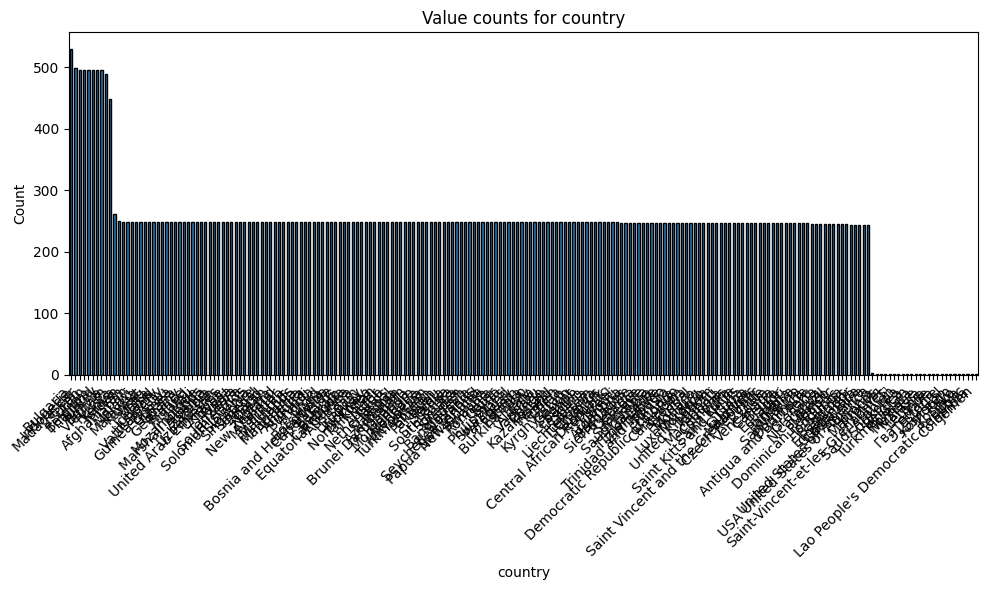

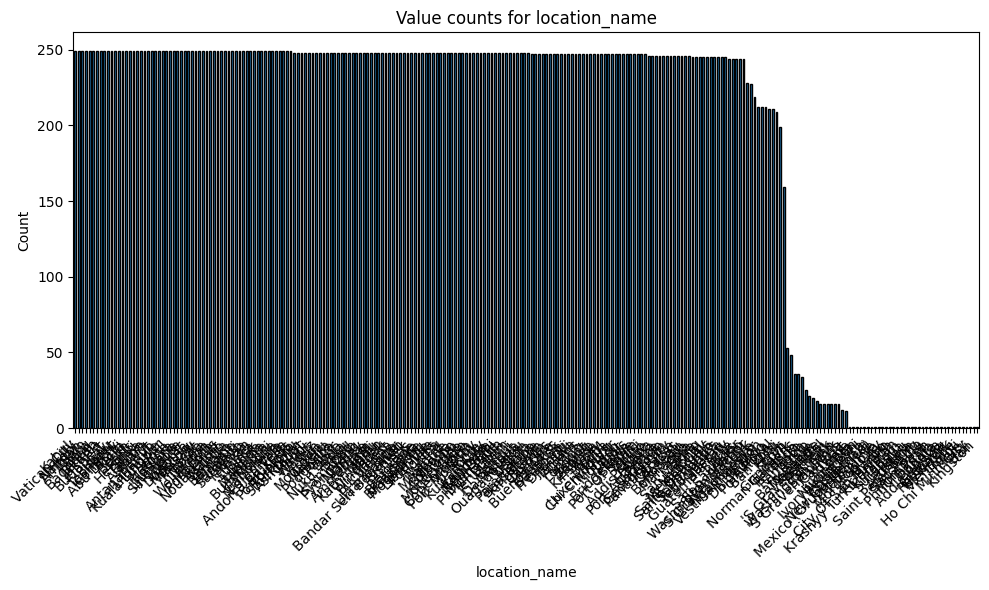

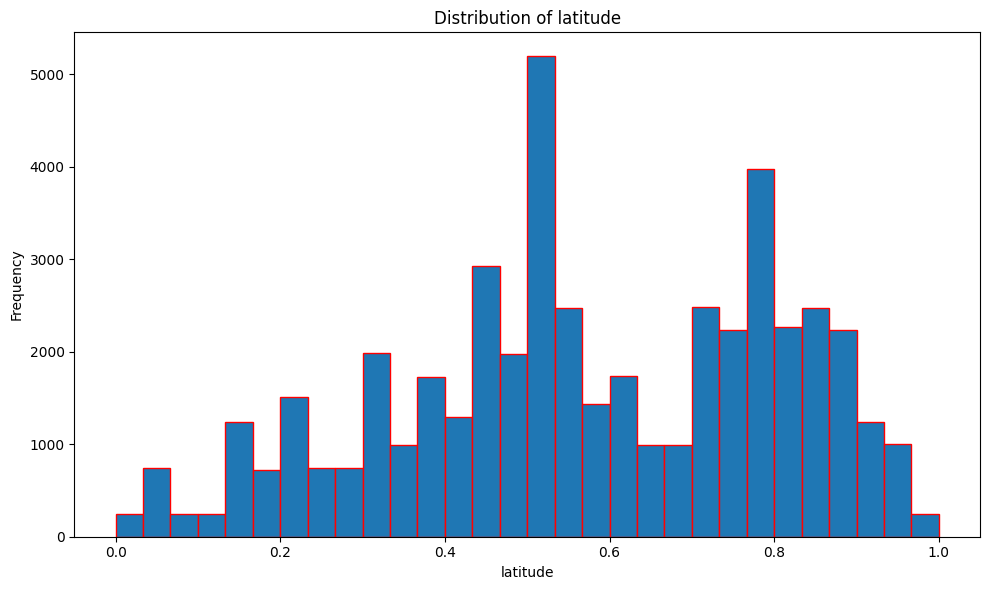

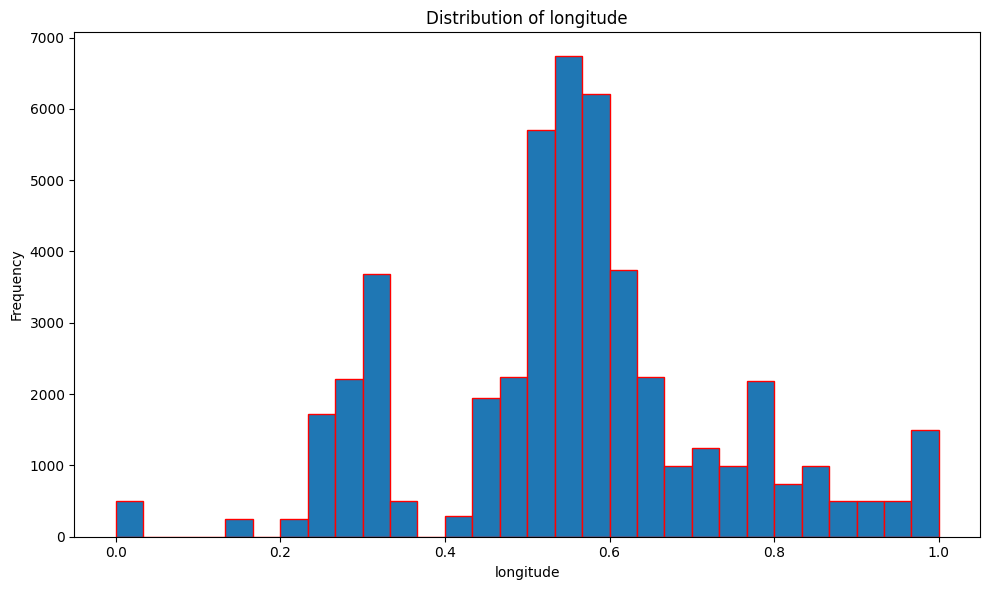

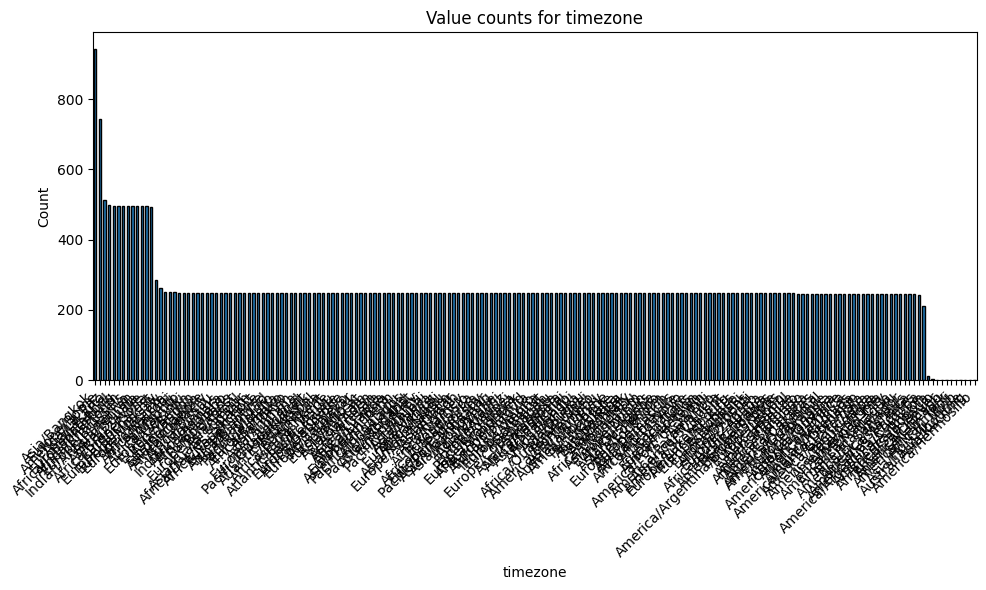

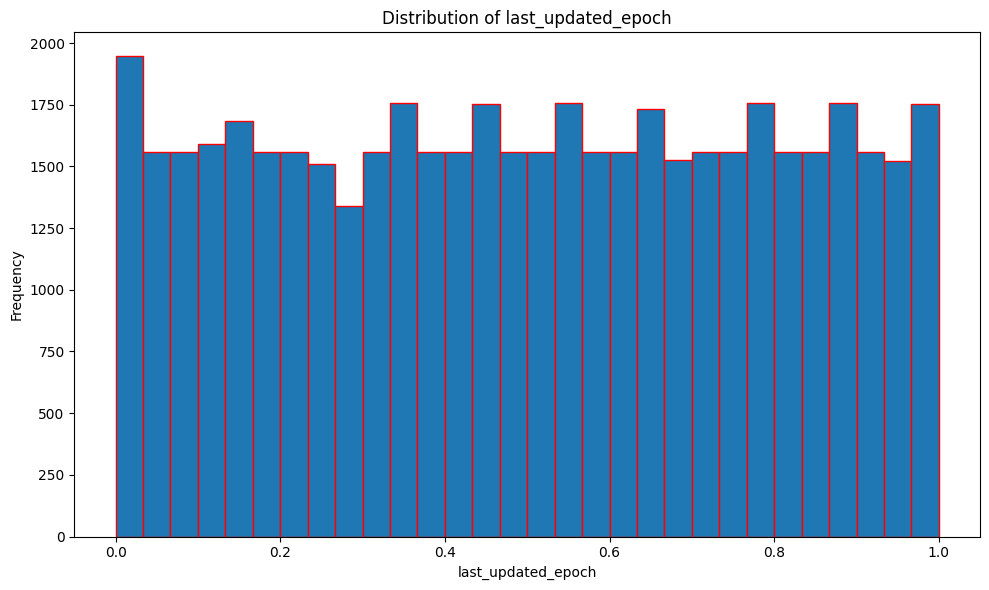

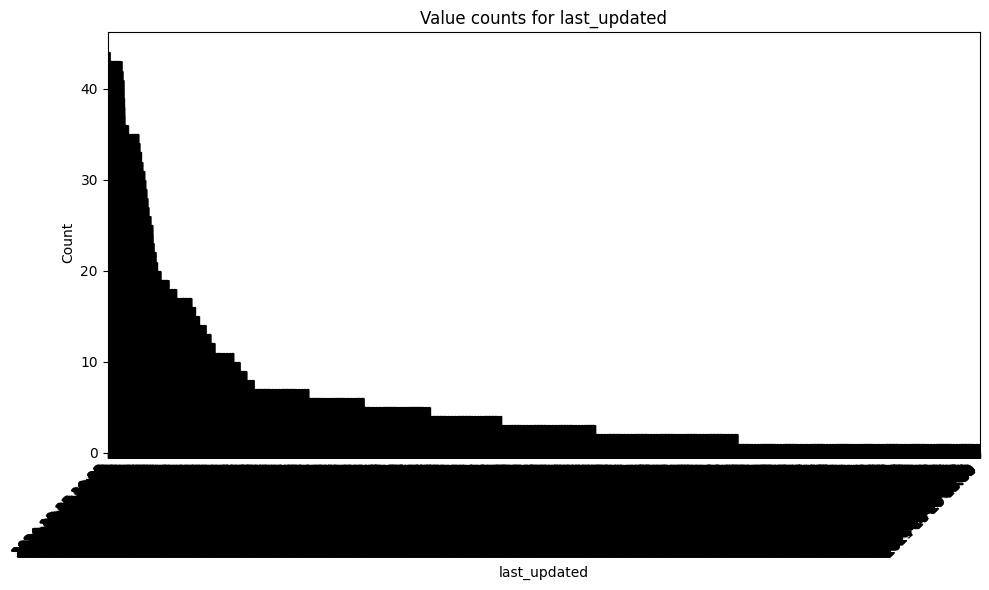

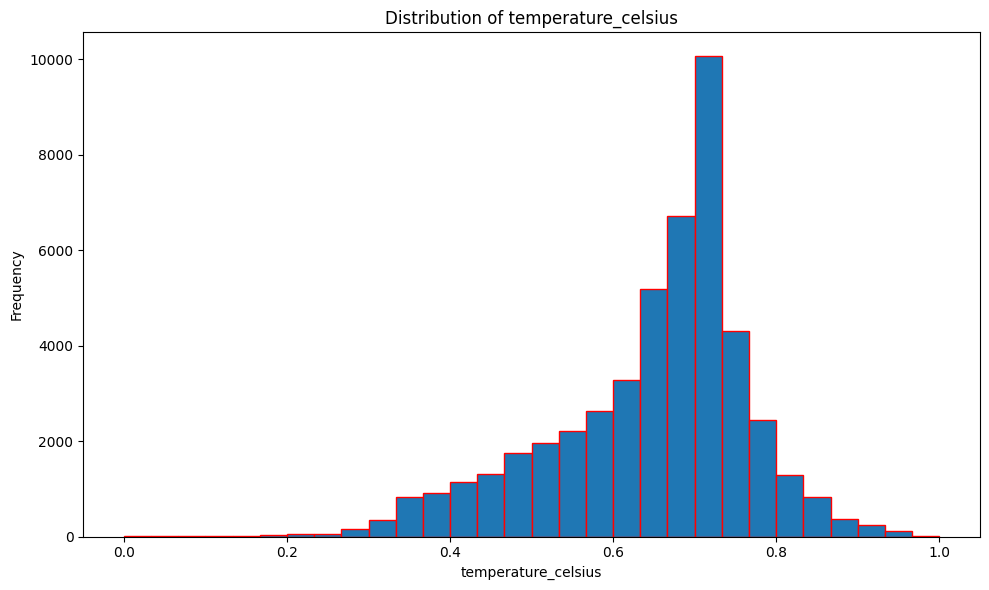

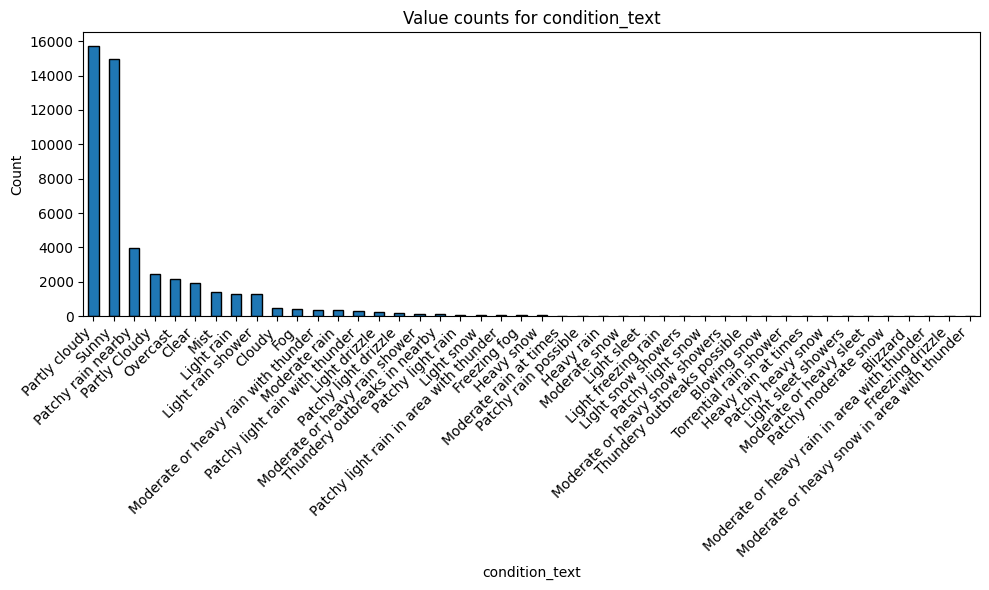

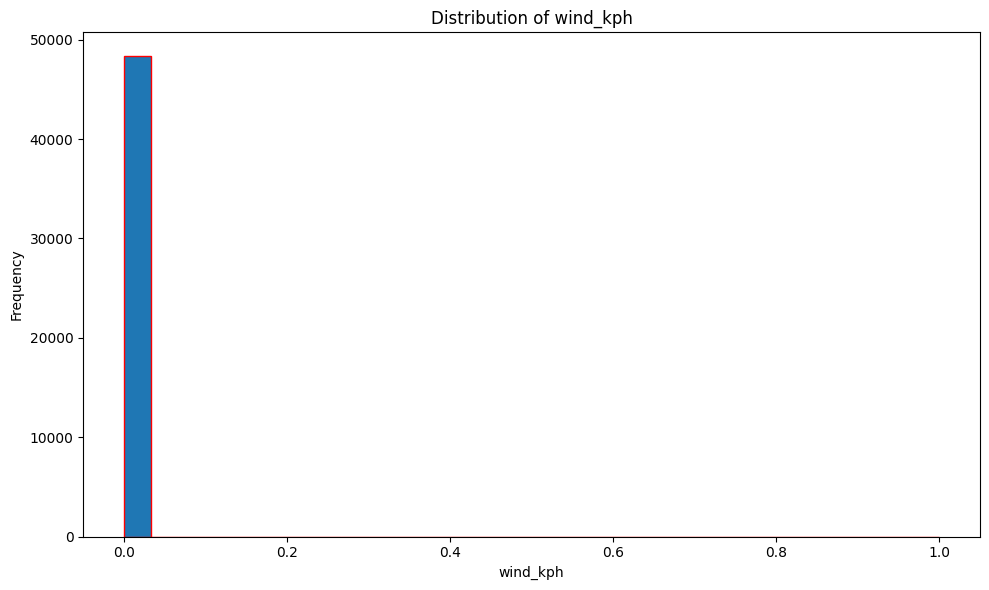

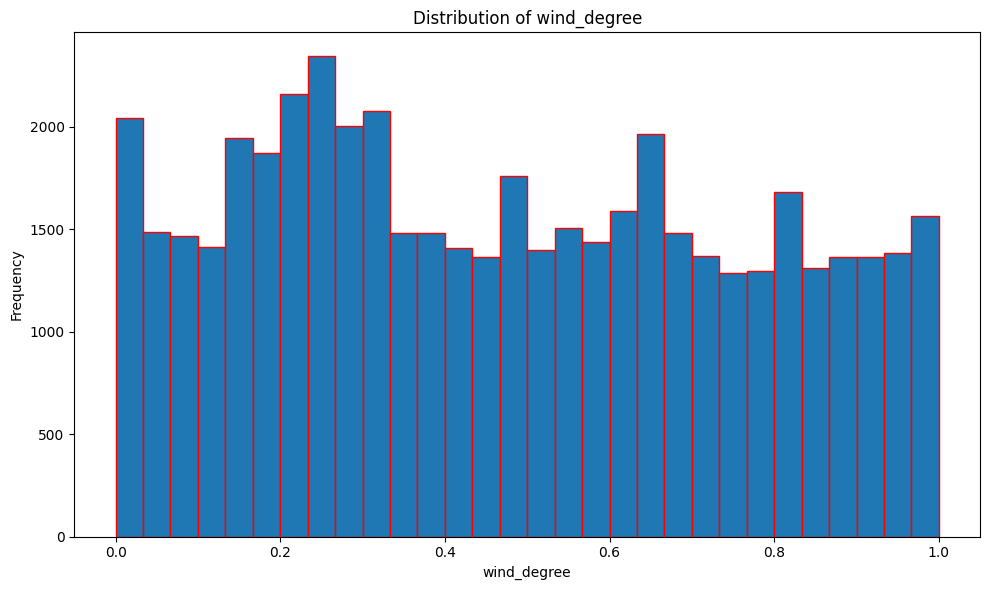

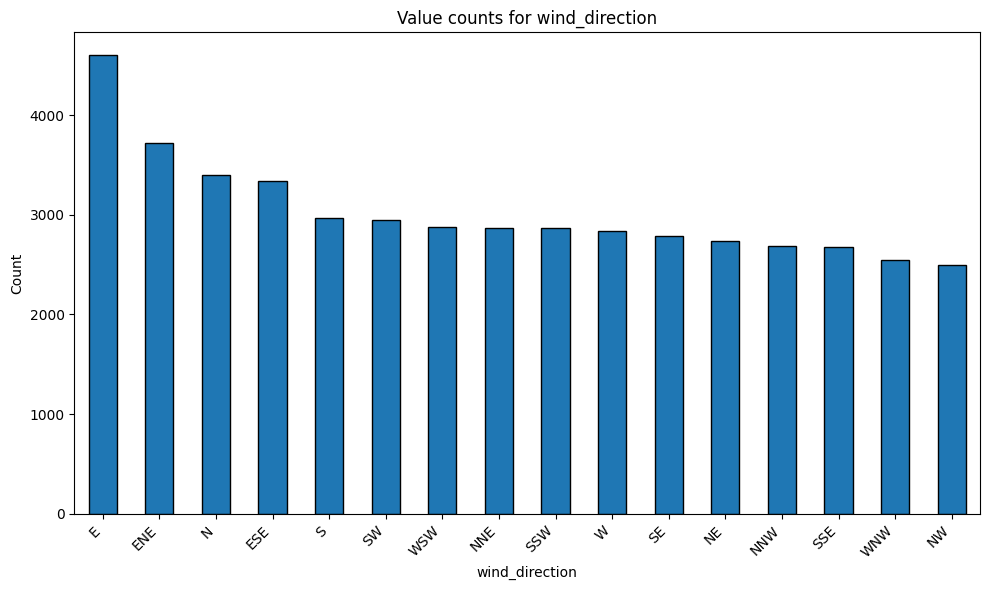

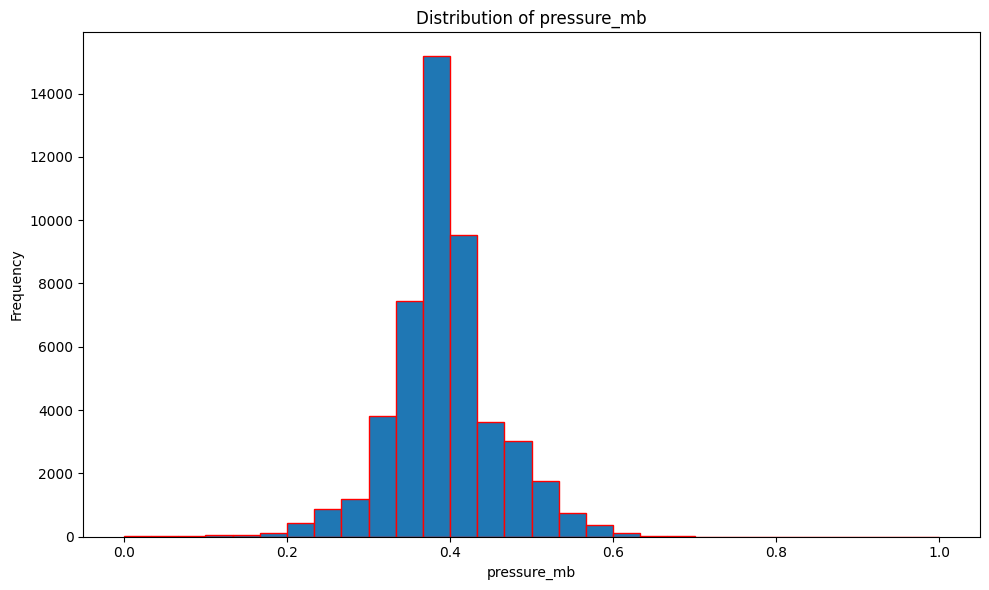

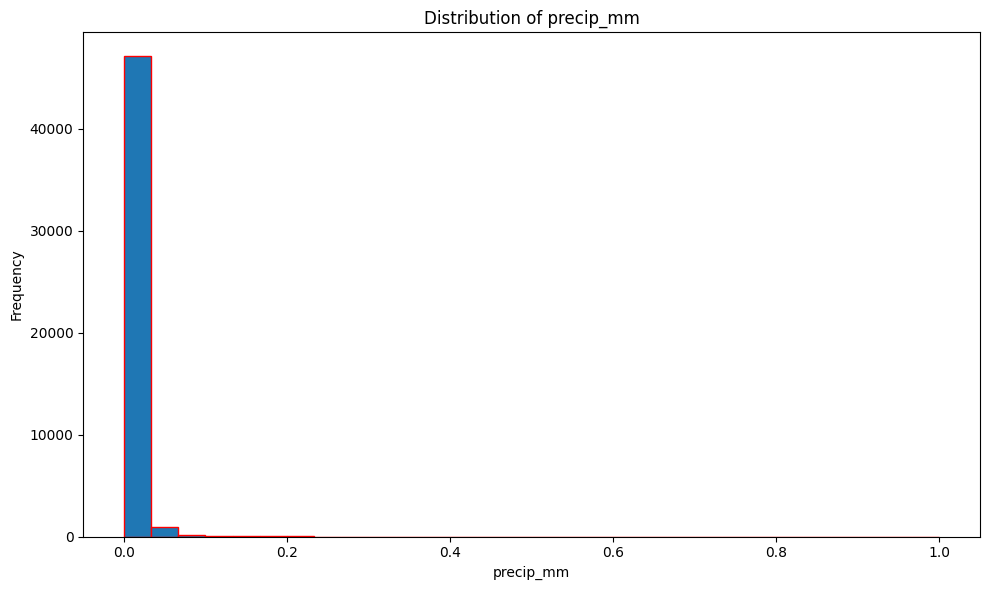

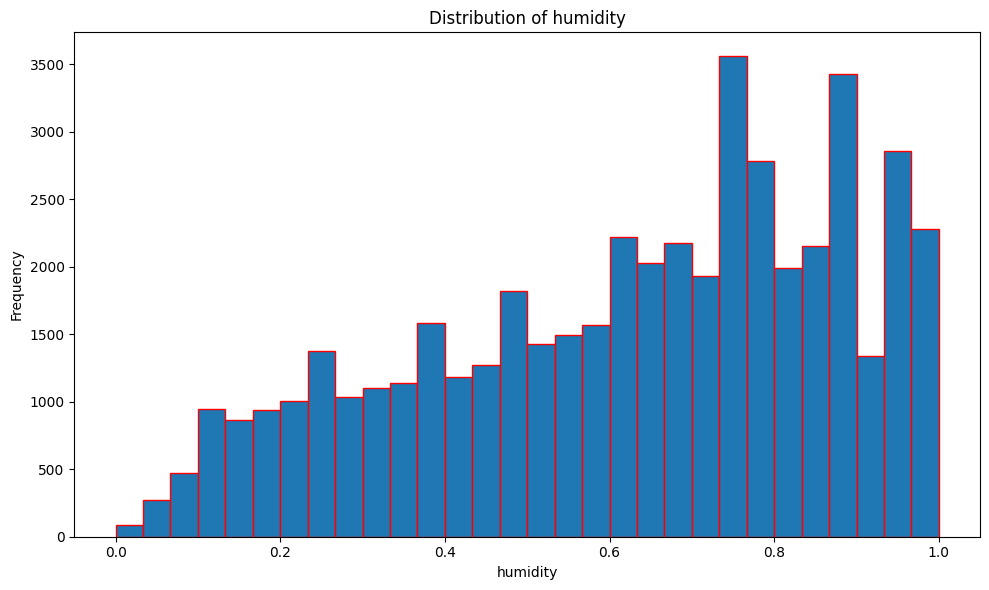

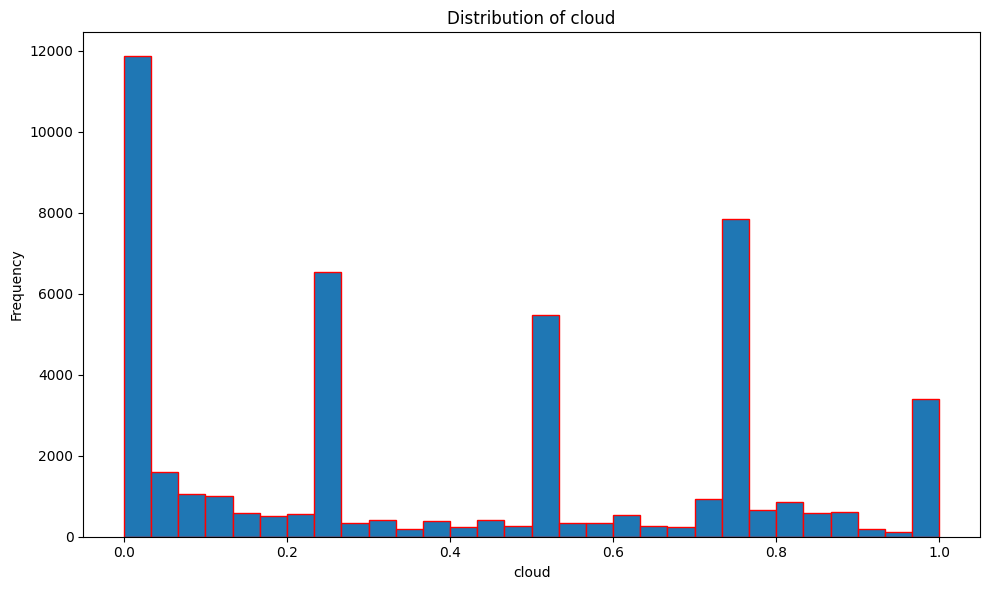

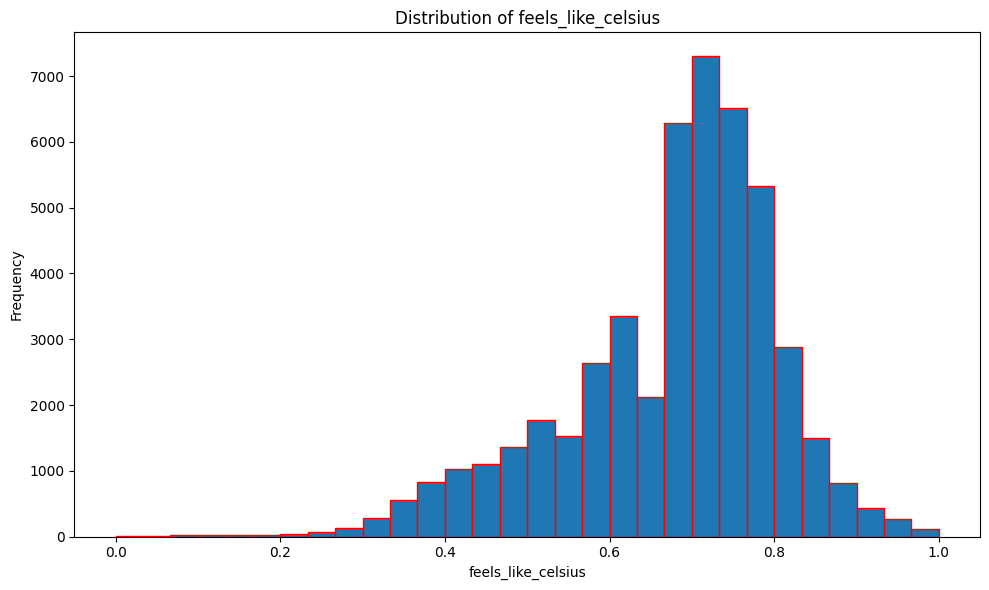

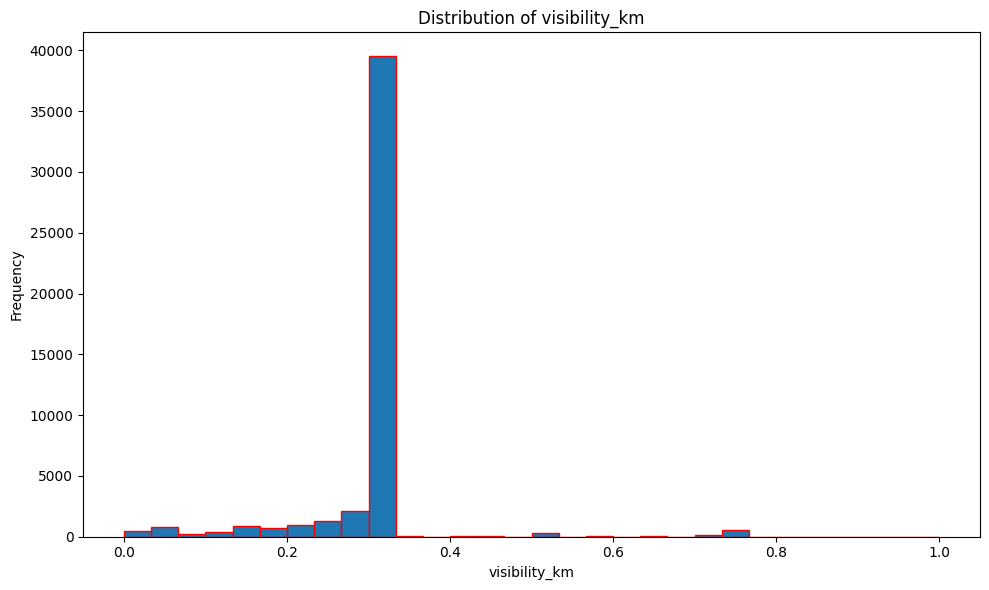

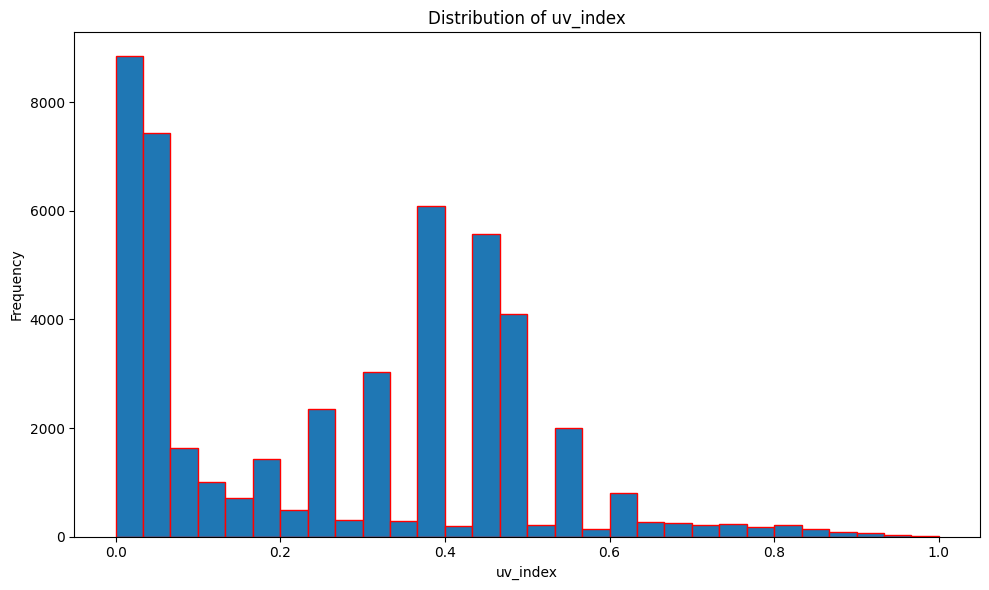

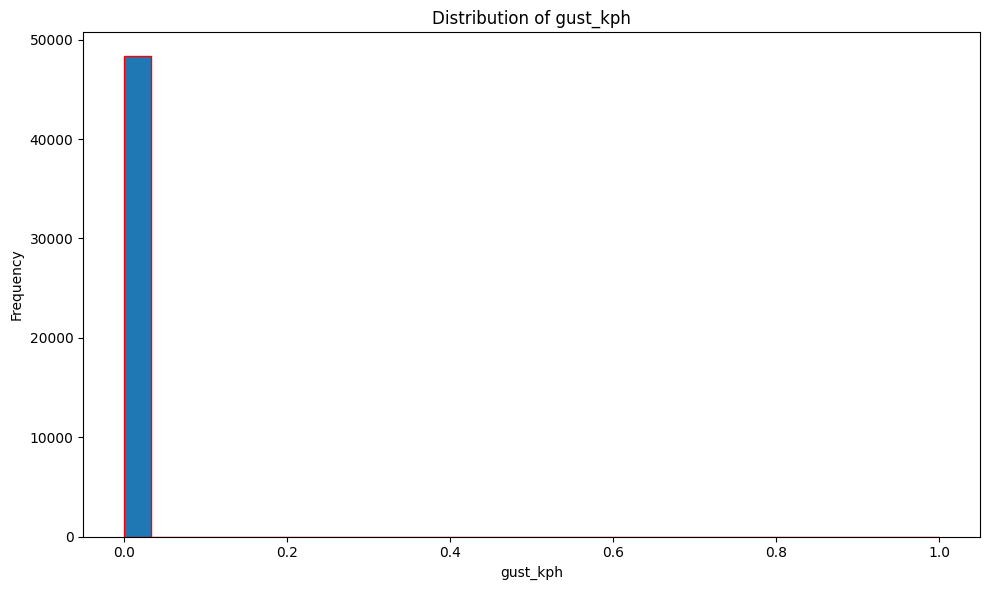

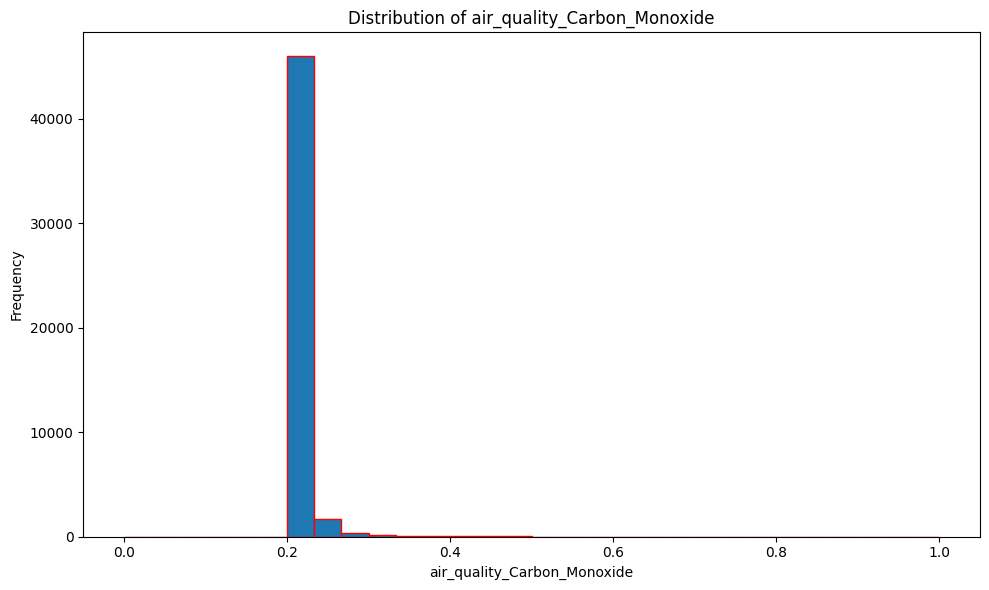

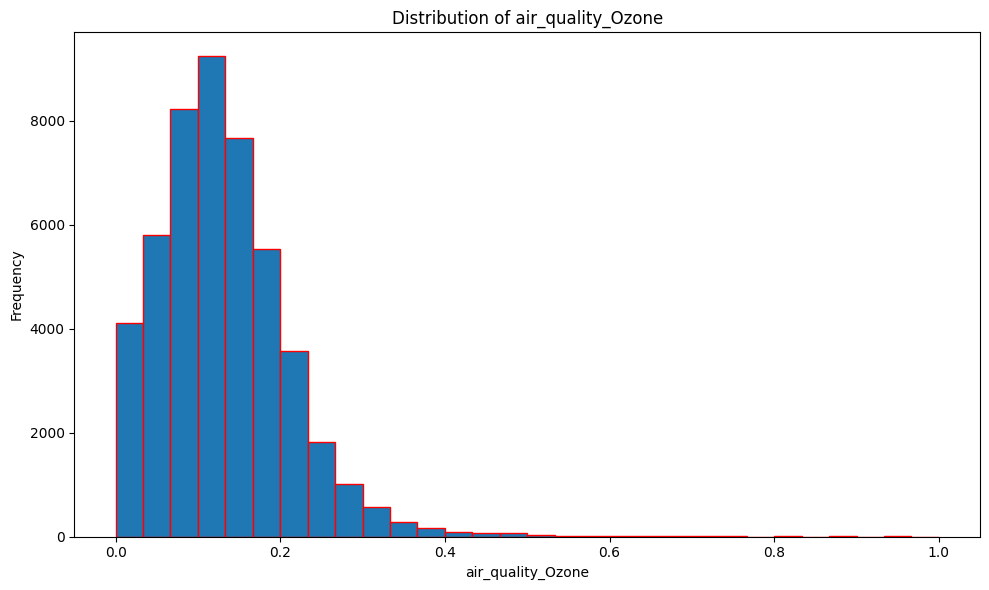

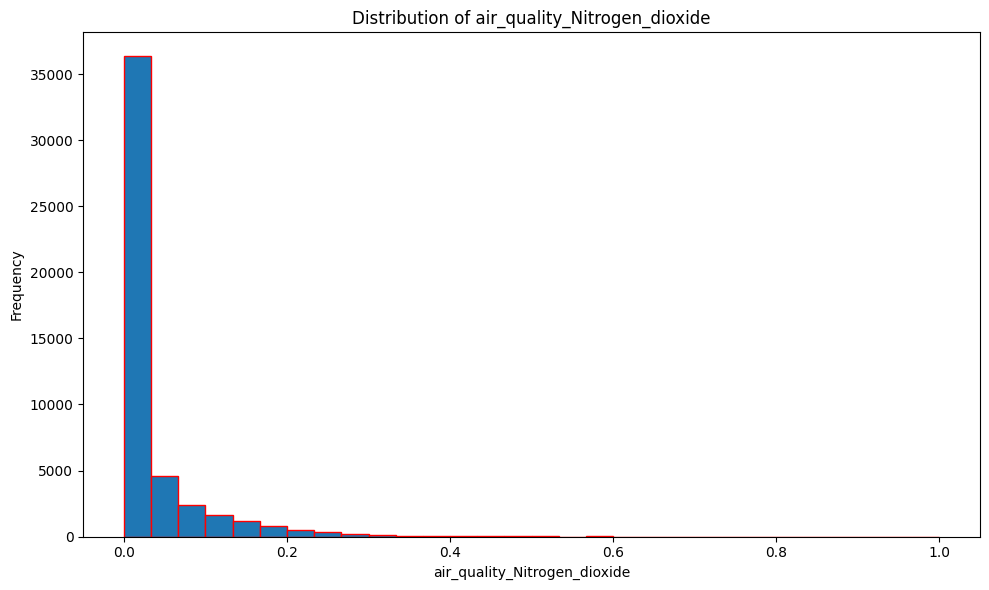

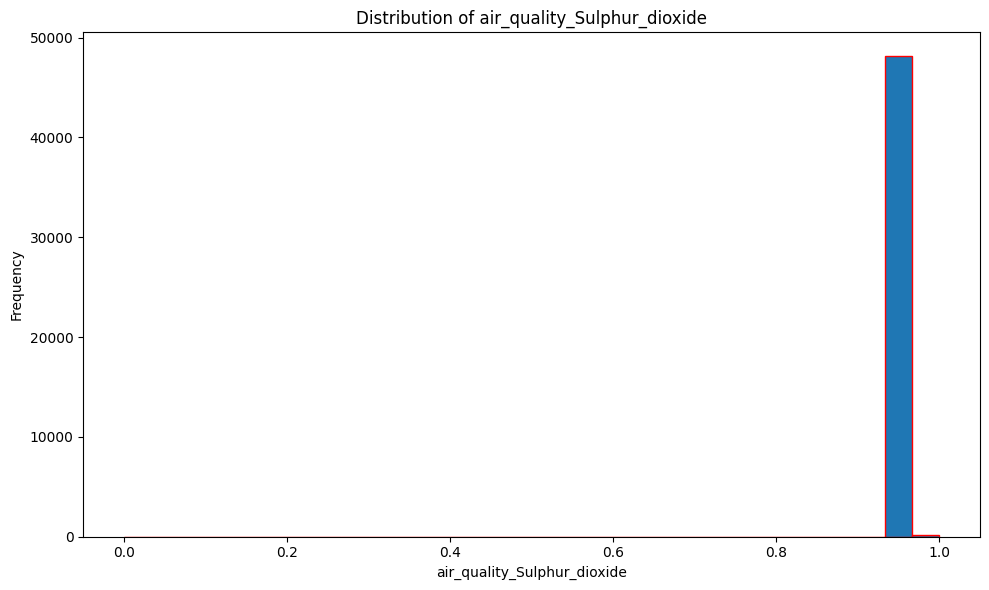

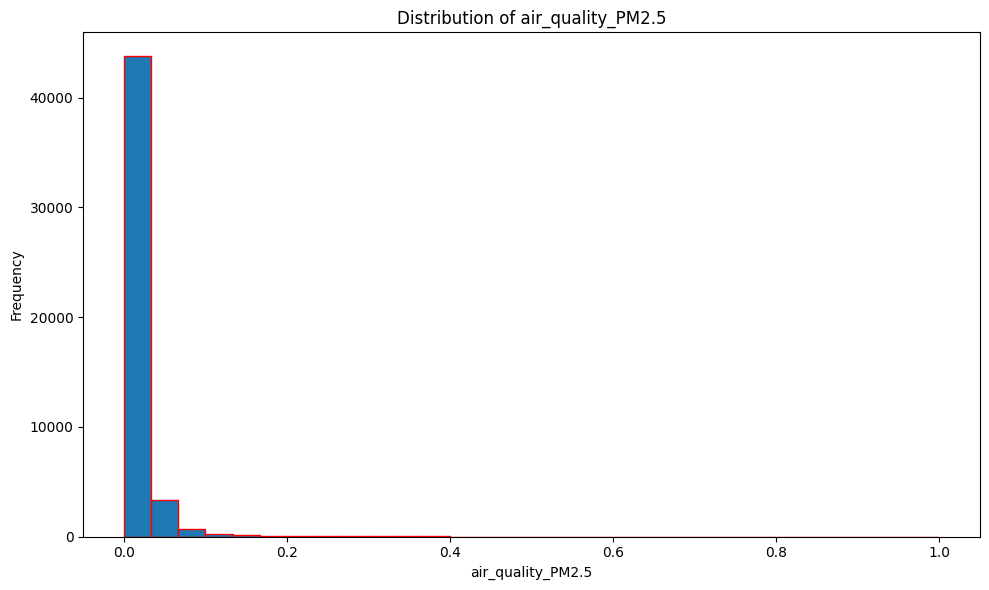

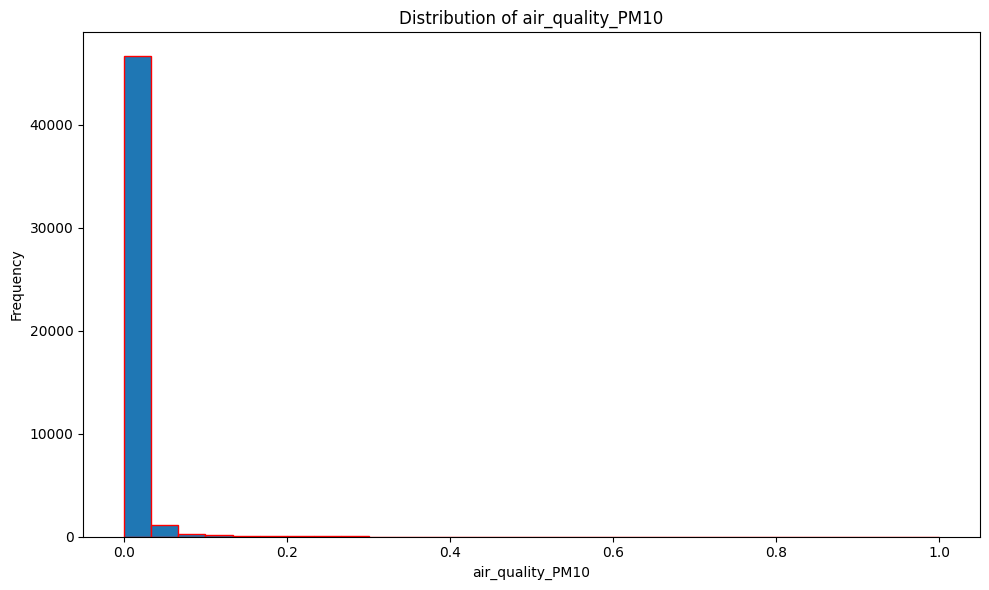

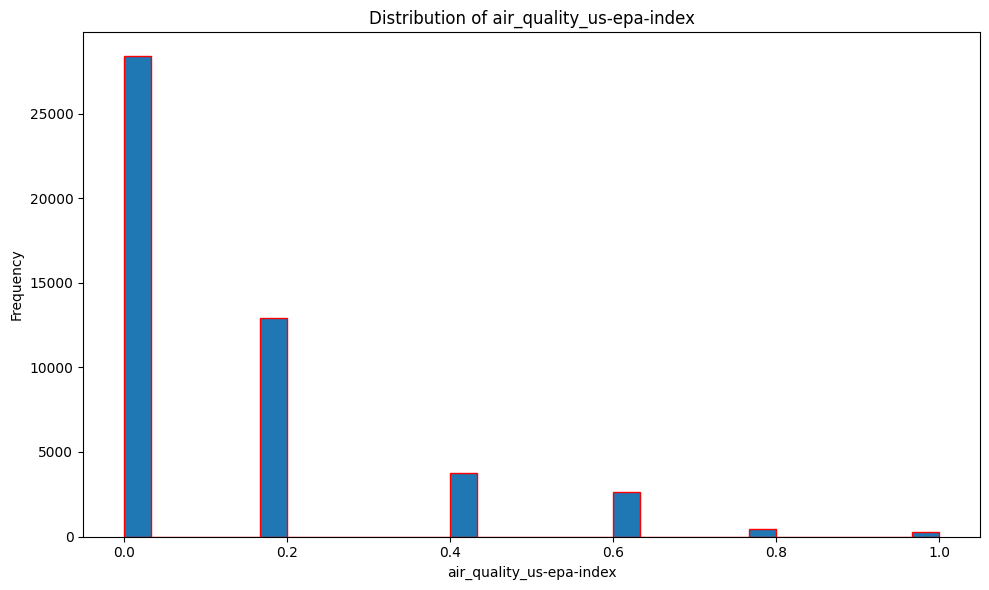

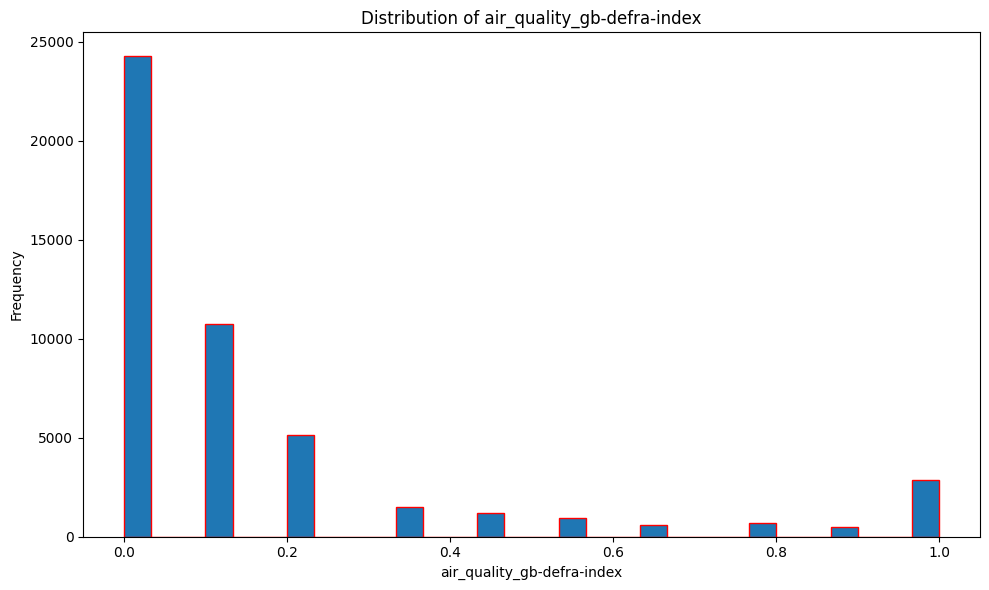

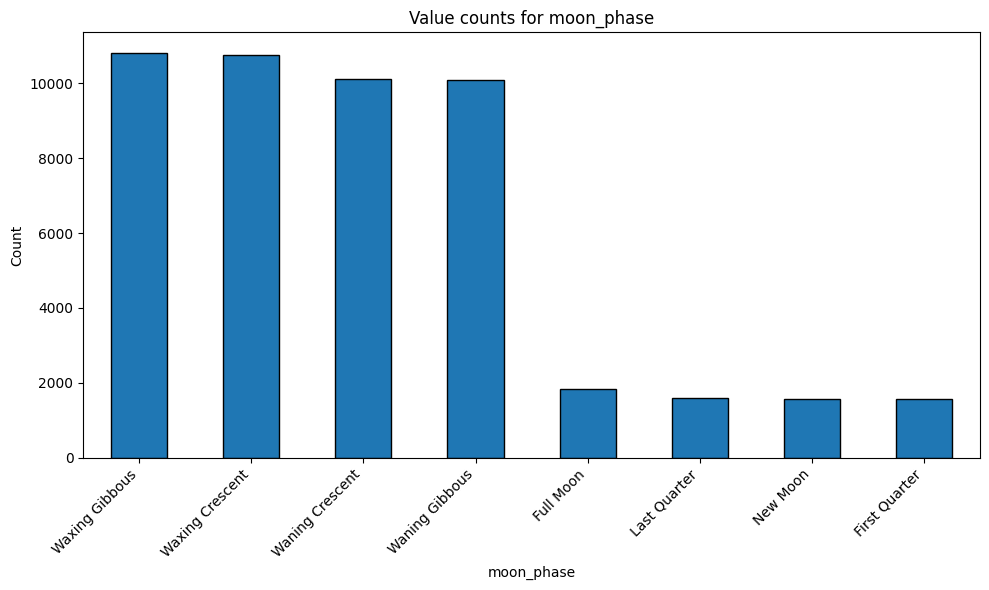

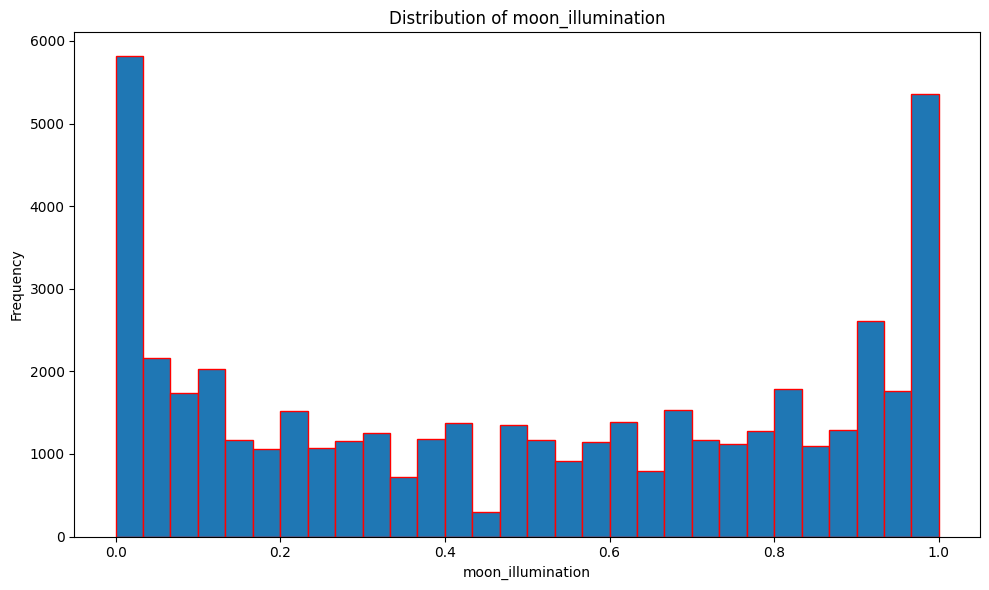

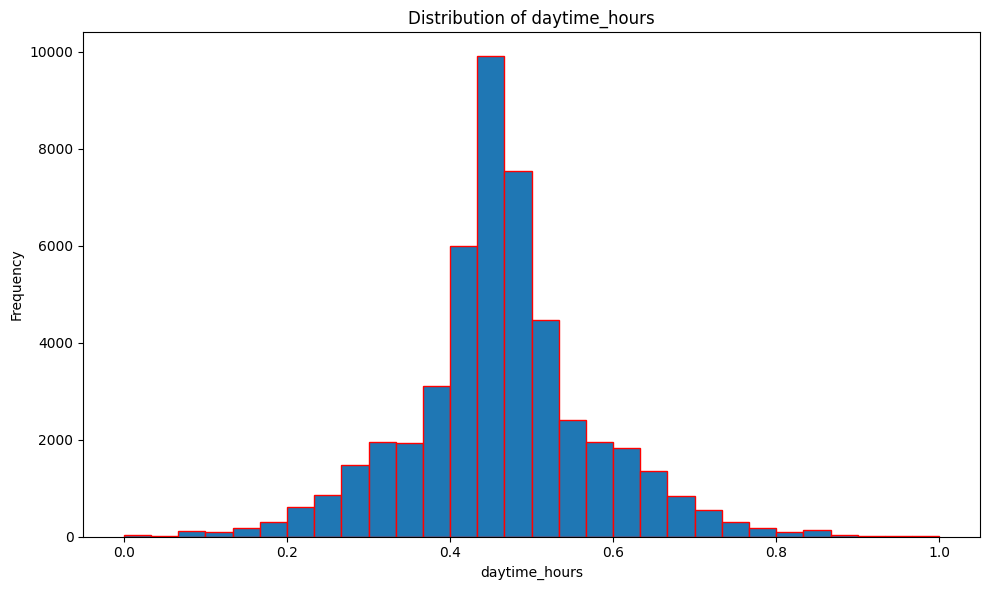

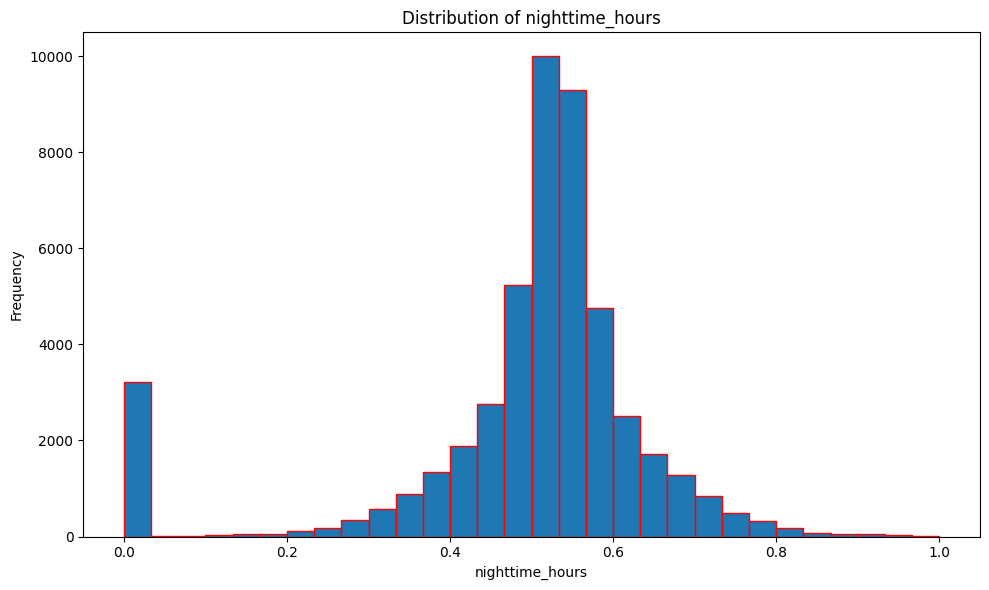

In [29]:
plot_feature_distributions(df)

# EDA

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


def basic_eda(df):
    # 1. Feature Distributions
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # 2. Correlation Analysis for Numerical Features
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
    
    # 3. ANOVA for Categorical Features
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    target_vars = ['temperature_celsius', 'pressure_mb', 'precip_mm', 'humidity']
    for target in target_vars:
        for cat_col in categorical_cols:
            if df[cat_col].nunique() > 1:  # Ensure the category has more than one unique value
                groups = [df[target][df[cat_col] == level].dropna() for level in df[cat_col].unique()]
                if len(groups) > 1:
                    f_stat, p_val = f_oneway(*groups)
                    print(f"ANOVA for {cat_col} vs {target}: F-statistic={f_stat:.2f}, p-value={p_val:.4f}")
    
    # 4. Trend Analysis (Temperature over time)
    if 'last_updated' in df.columns and 'temperature_celsius' in df.columns:
        df['last_updated'] = pd.to_datetime(df['last_updated'])
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='last_updated', y='temperature_celsius', data=df)
        plt.title('Temperature Trend Over Time')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.xticks(rotation=45)
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


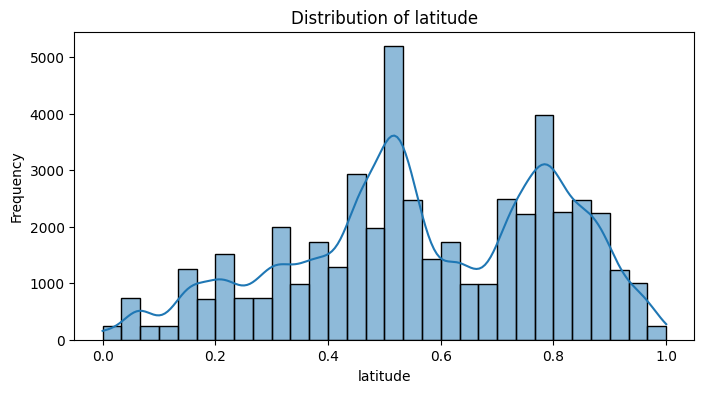

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


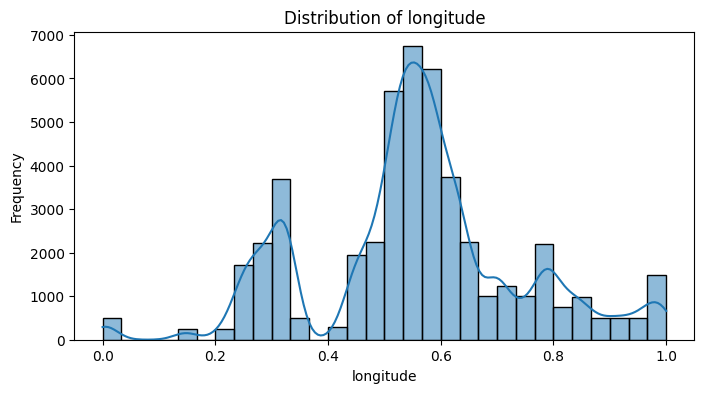

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


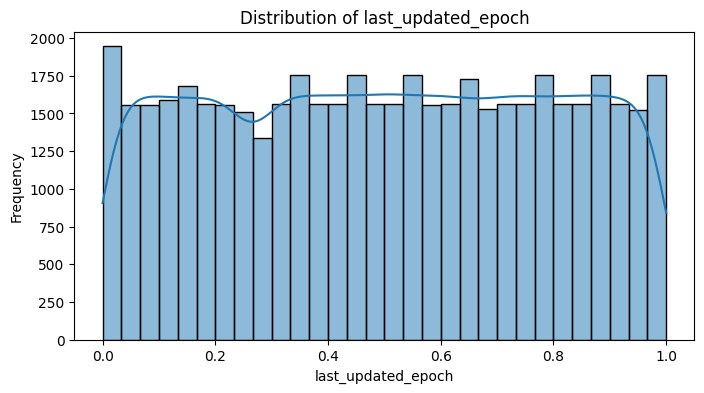

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


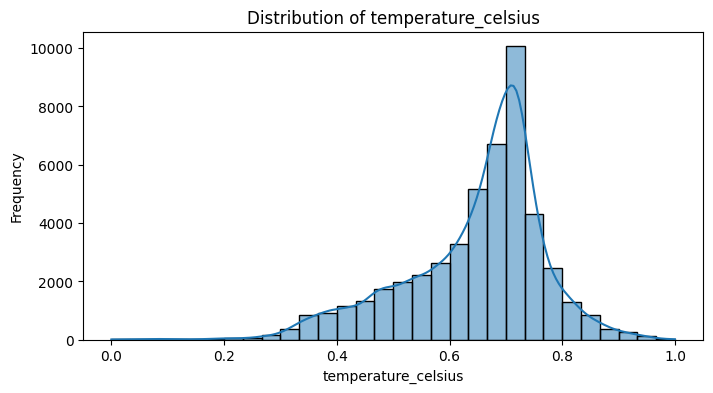

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


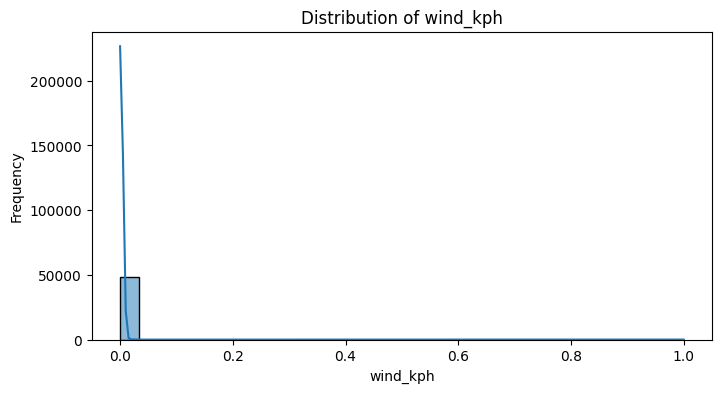

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


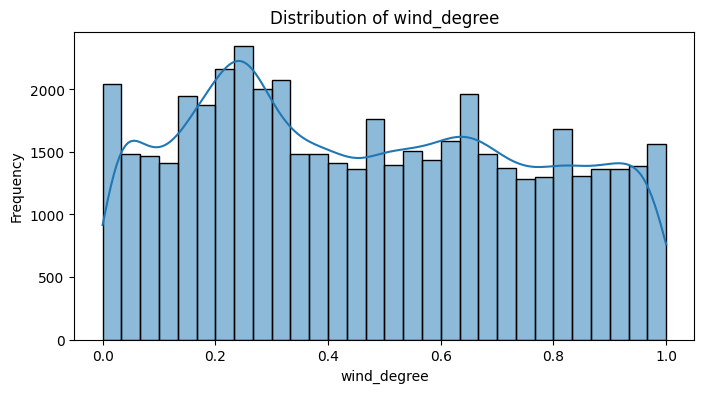

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


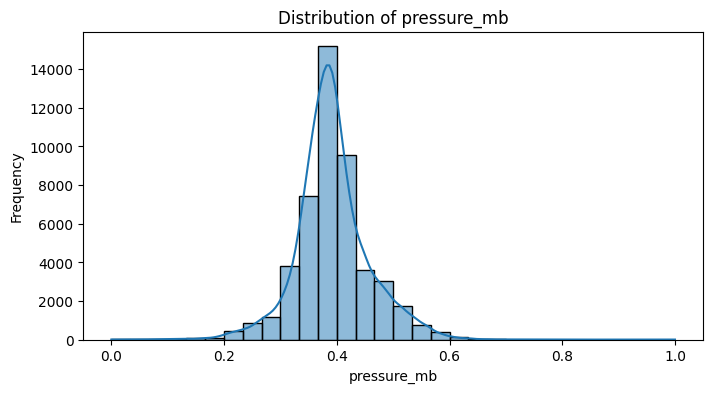

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


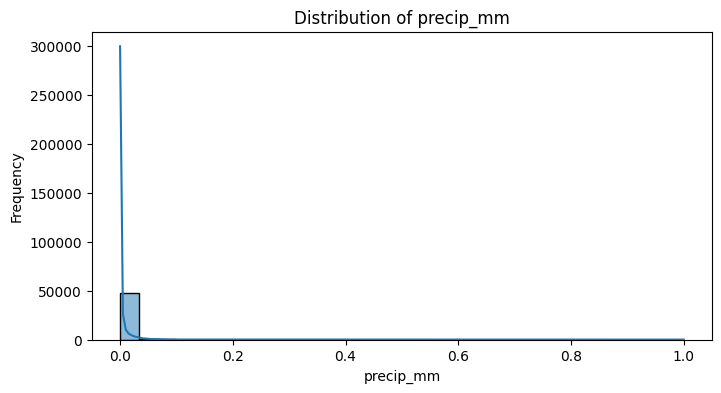

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


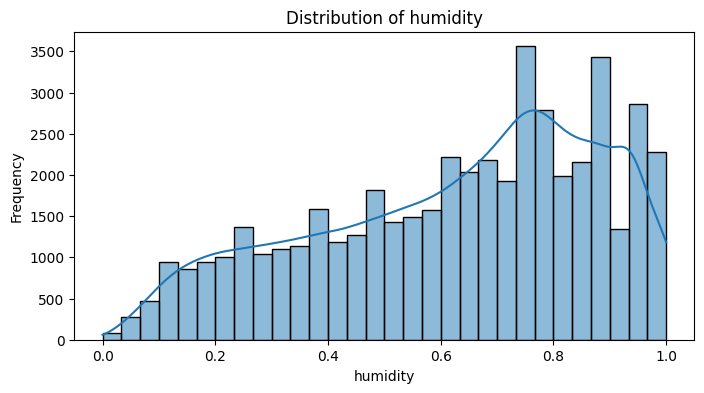

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


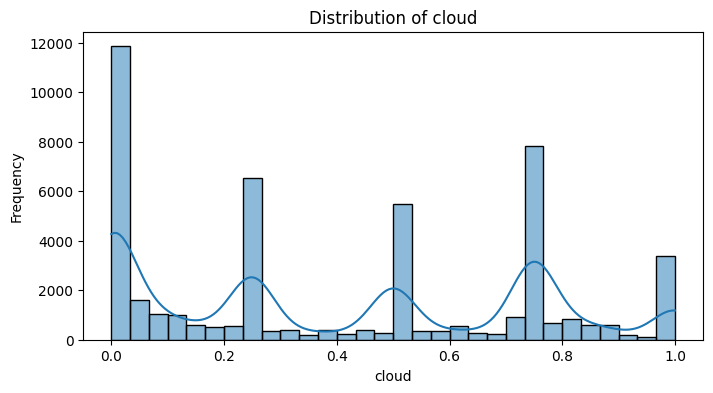

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


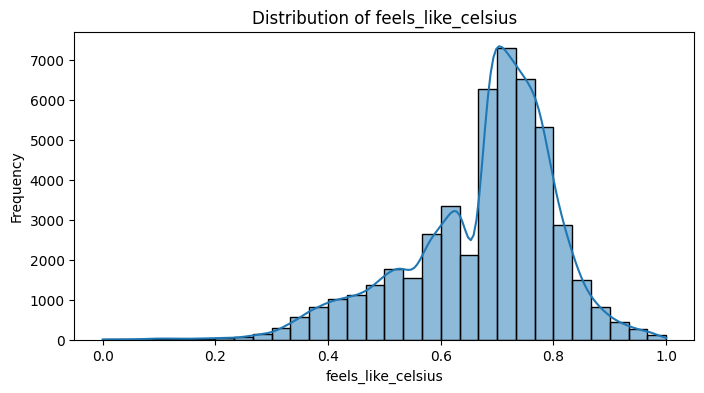

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


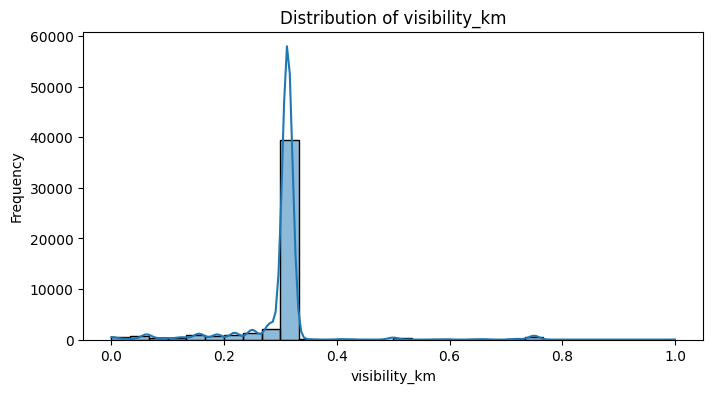

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


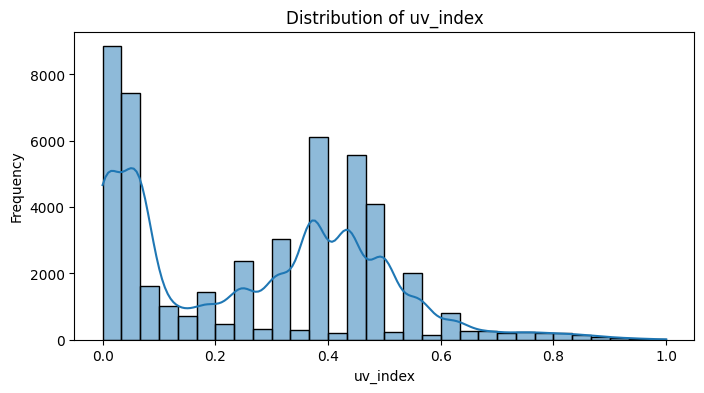

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


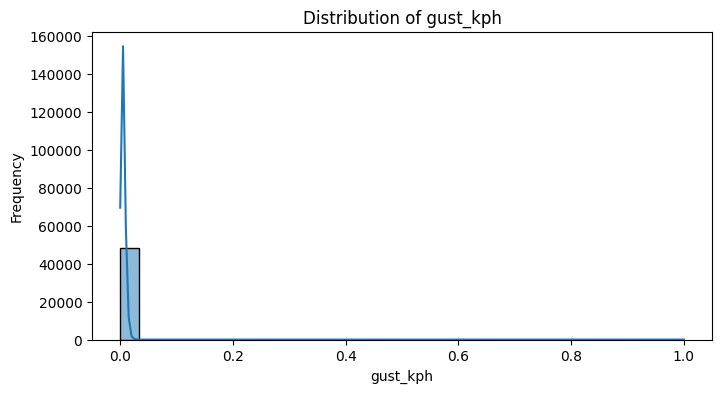

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


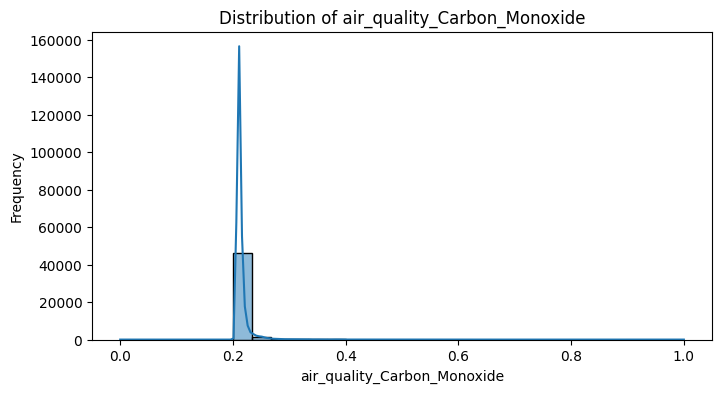

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


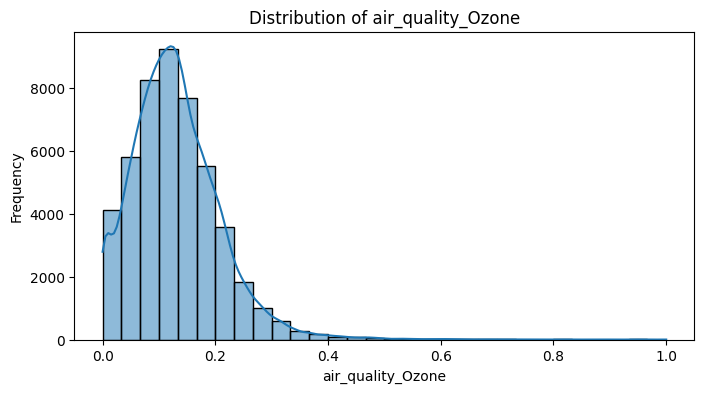

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


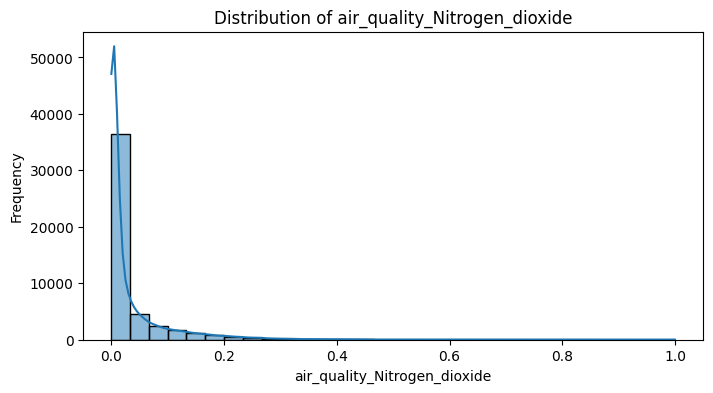

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


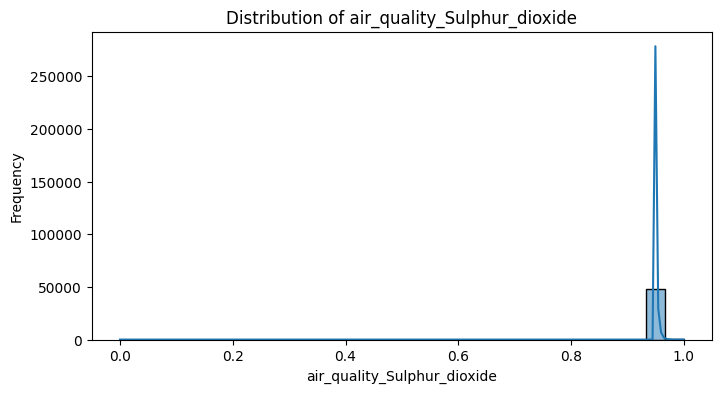

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


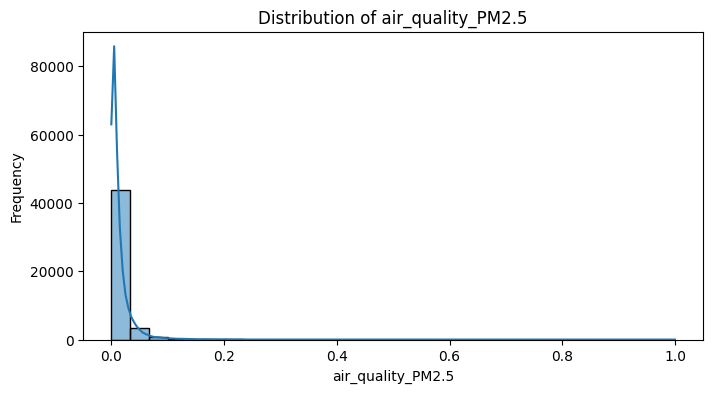

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


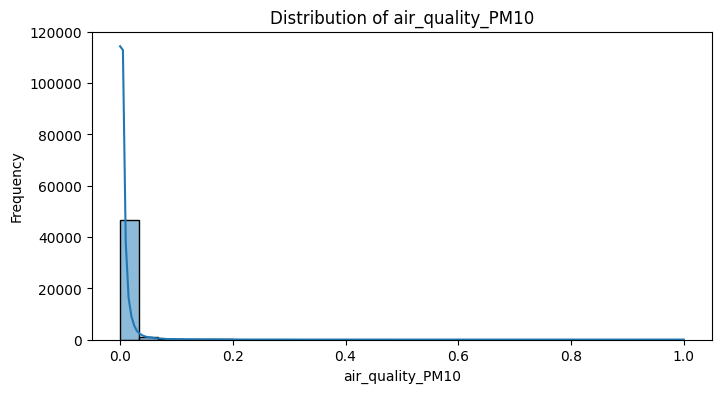

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


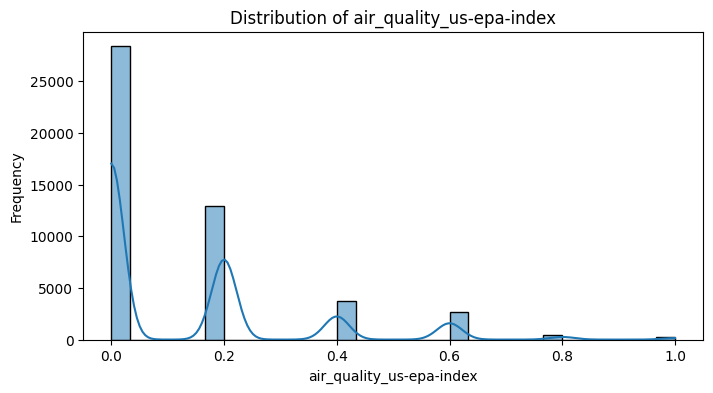

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


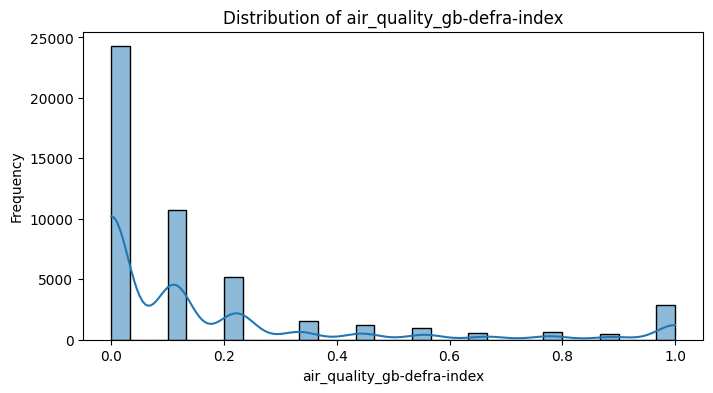

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


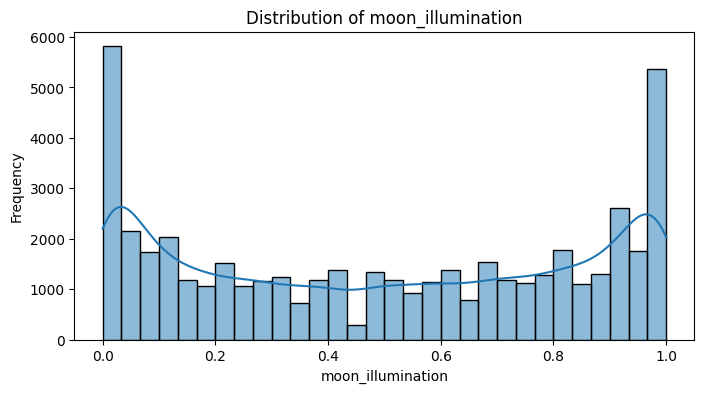

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


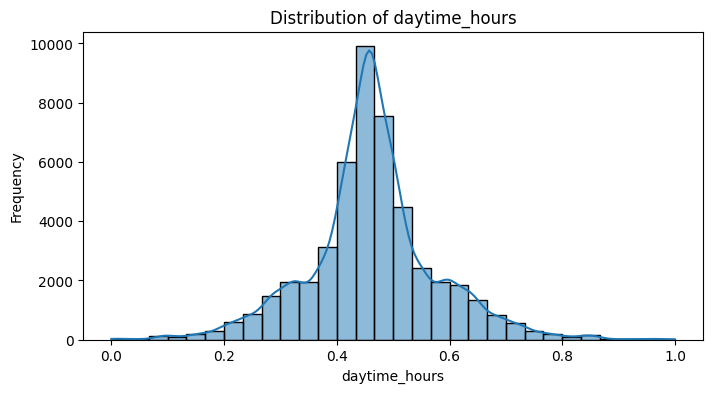

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


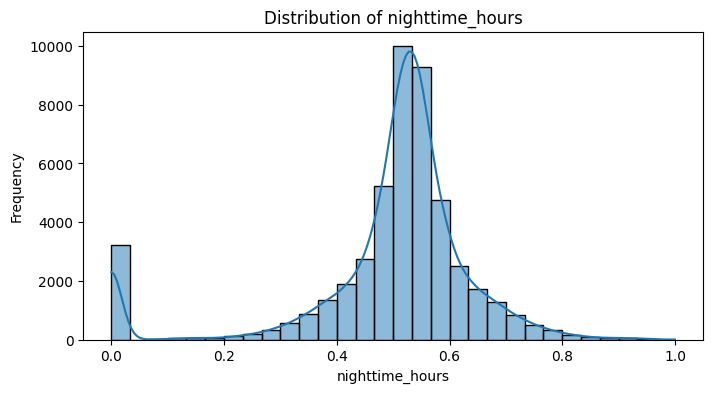

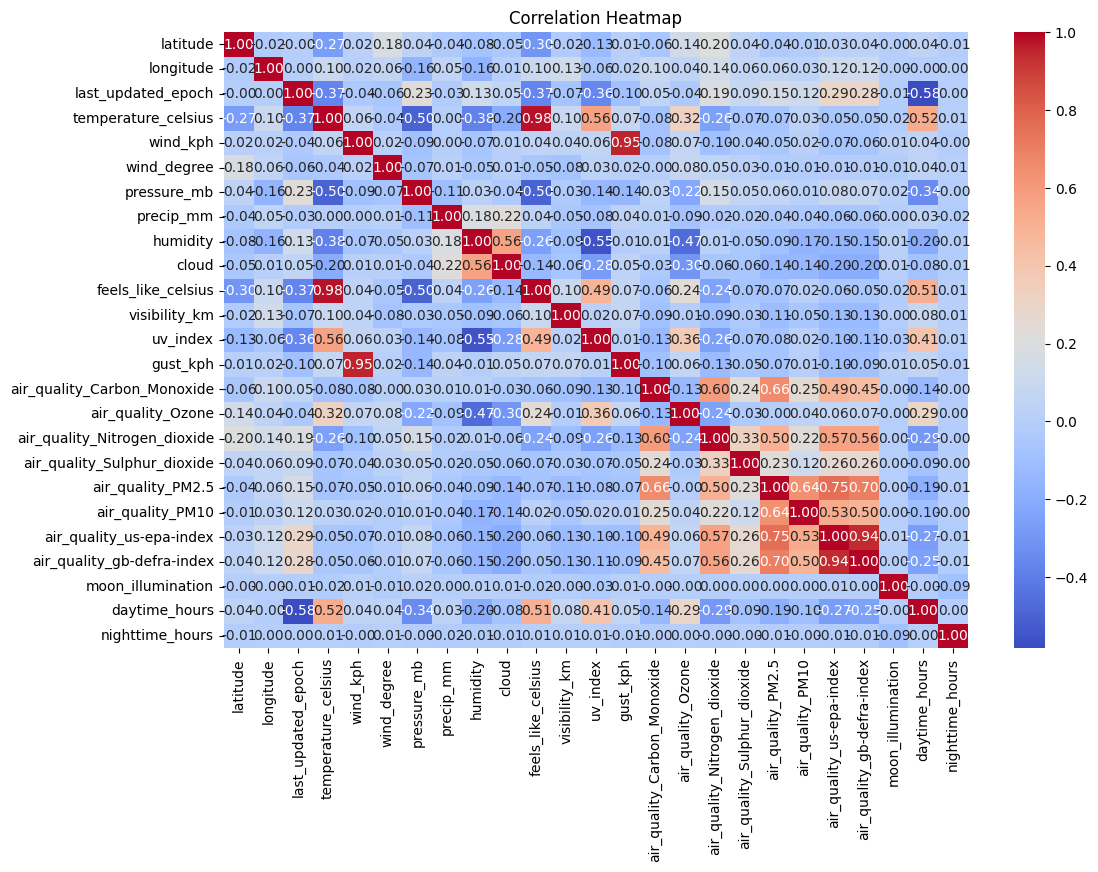

ANOVA for country vs temperature_celsius: F-statistic=205.73, p-value=0.0000
ANOVA for location_name vs temperature_celsius: F-statistic=180.30, p-value=0.0000
ANOVA for timezone vs temperature_celsius: F-statistic=225.41, p-value=0.0000
ANOVA for last_updated vs temperature_celsius: F-statistic=3.35, p-value=0.0000
ANOVA for condition_text vs temperature_celsius: F-statistic=157.27, p-value=0.0000
ANOVA for wind_direction vs temperature_celsius: F-statistic=29.65, p-value=0.0000
ANOVA for moon_phase vs temperature_celsius: F-statistic=10.47, p-value=0.0000
ANOVA for country vs pressure_mb: F-statistic=77.70, p-value=0.0000
ANOVA for location_name vs pressure_mb: F-statistic=67.43, p-value=0.0000
ANOVA for timezone vs pressure_mb: F-statistic=85.31, p-value=0.0000
ANOVA for last_updated vs pressure_mb: F-statistic=3.60, p-value=0.0000
ANOVA for condition_text vs pressure_mb: F-statistic=36.33, p-value=0.0000
ANOVA for wind_direction vs pressure_mb: F-statistic=28.30, p-value=0.0000
ANO

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


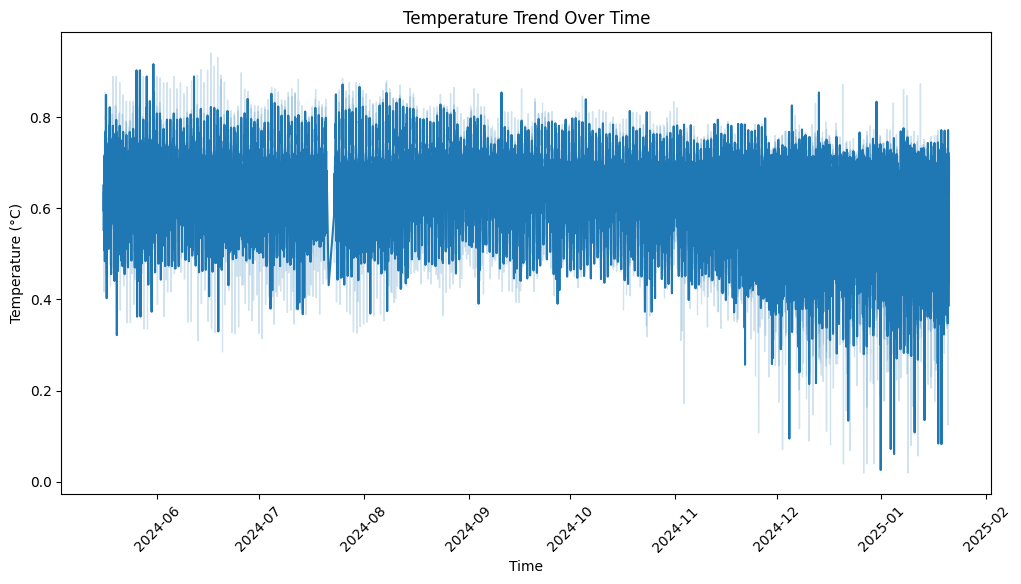

In [31]:
basic_eda(df)

now check the patterns

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Function to analyze the most related feature for each column
def most_related_features(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # 1. Correlation for numeric features
    correlation_matrix = df[numeric_cols].corr()
    most_correlated = {}
    for col in numeric_cols:
        # Exclude self-correlation by masking the diagonal value
        temp_corr = correlation_matrix[col].where(correlation_matrix[col].index != col)
        temp_corr = temp_corr.dropna()  # Drop NaN values to avoid idxmax errors
        if not temp_corr.empty:
            most_related_col = temp_corr.abs().idxmax()
            most_correlated[col] = (most_related_col, temp_corr[most_related_col])
        else:
            most_correlated[col] = (None, None)
    
    # 2. ANOVA for categorical features
    anova_results = {}
    for cat_col in categorical_cols:
        best_feature = None
        best_f_stat = -1
        for num_col in numeric_cols:
            groups = [df[num_col][df[cat_col] == level].dropna() for level in df[cat_col].unique()]
            if len(groups) > 1:
                f_stat, _ = f_oneway(*groups)
                if f_stat > best_f_stat:
                    best_f_stat = f_stat
                    best_feature = num_col
        if best_feature:
            anova_results[cat_col] = (best_feature, best_f_stat)
    
    # Display the most related features
    print("Most Related Features Based on Correlation (Numeric):")
    for feature, (related_feature, corr_value) in most_correlated.items():
        if related_feature:
            print(f"{feature} is most correlated with {related_feature} (Correlation: {corr_value:.2f})")
        else:
            print(f"{feature} has no significant correlation with other numeric features.")
            
    print("\nMost Related Features Based on ANOVA (Categorical):")
    for feature, (related_feature, f_stat) in anova_results.items():
        print(f"{feature} is most related to {related_feature} (F-statistic: {f_stat:.2f})")

In [33]:
most_related_features(df)

Most Related Features Based on Correlation (Numeric):
latitude is most correlated with feels_like_celsius (Correlation: -0.30)
longitude is most correlated with humidity (Correlation: -0.16)
last_updated_epoch is most correlated with daytime_hours (Correlation: -0.58)
temperature_celsius is most correlated with feels_like_celsius (Correlation: 0.98)
wind_kph is most correlated with gust_kph (Correlation: 0.95)
wind_degree is most correlated with latitude (Correlation: 0.18)
pressure_mb is most correlated with temperature_celsius (Correlation: -0.50)
precip_mm is most correlated with cloud (Correlation: 0.22)
humidity is most correlated with cloud (Correlation: 0.56)
cloud is most correlated with humidity (Correlation: 0.56)
feels_like_celsius is most correlated with temperature_celsius (Correlation: 0.98)
visibility_km is most correlated with longitude (Correlation: 0.13)
uv_index is most correlated with temperature_celsius (Correlation: 0.56)
gust_kph is most correlated with wind_kph 

country → longitude (F-statistic: 1,317,211.98):
A very high F-statistic implies a very strong relationship between the country and longitude, which makes sense because each country spans a specific range of longitudes.

location_name → longitude (F-statistic: 701,613.30):
Similarly, the high F-value shows that location_name (likely a city or region) is strongly tied to its geographic longitude.

timezone → longitude (F-statistic: 1,297,654.93):
Time zones are geographically defined by longitude, so this high F-statistic correctly reflects this relationship.

condition_text → cloud (F-statistic: 3,739.04):
This high F-statistic suggests that different weather conditions (condition_text) are significantly related to cloud cover.

wind_direction → wind_degree (F-statistic: 9,312.90):
A strong relationship is expected because wind_direction is typically a categorical version of the continuous wind_degree measurement.

moon_phase → moon_illumination (F-statistic: 34,059.65):
This reflects the direct relationship between the moon phase and its illumination, as certain phases naturally correspond to different brightness levels.

**geneated by chatGPT**

# visualizations for temperature and precipitation.

In [34]:
def visualize(df):
    if 'temperature_celsius' in df.columns and 'precip_mm' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='temperature_celsius', y='precip_mm', data=df)
        plt.title('Temperature vs Precipitation')
        plt.xlabel('Temperature (°C)')
        plt.ylabel('Precipitation (mm)')
        plt.show()
    
    if 'last_updated' in df.columns and 'precip_mm' in df.columns:
        df['last_updated'] = pd.to_datetime(df['last_updated'])
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='last_updated', y='precip_mm', data=df, label='Precipitation', color='blue')
        sns.lineplot(x='last_updated', y='temperature_celsius', data=df, label='Temperature', color='orange')
        plt.title('Temperature and Precipitation Over Time')
        plt.xlabel('Time')
        plt.ylabel('Measurements')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()


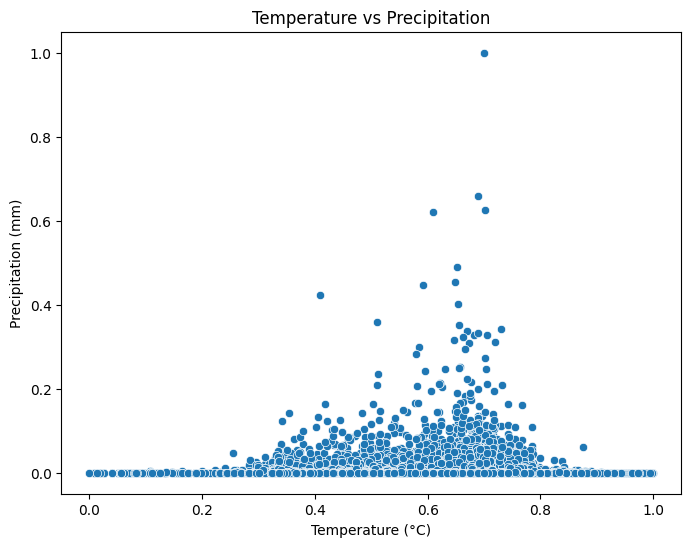

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

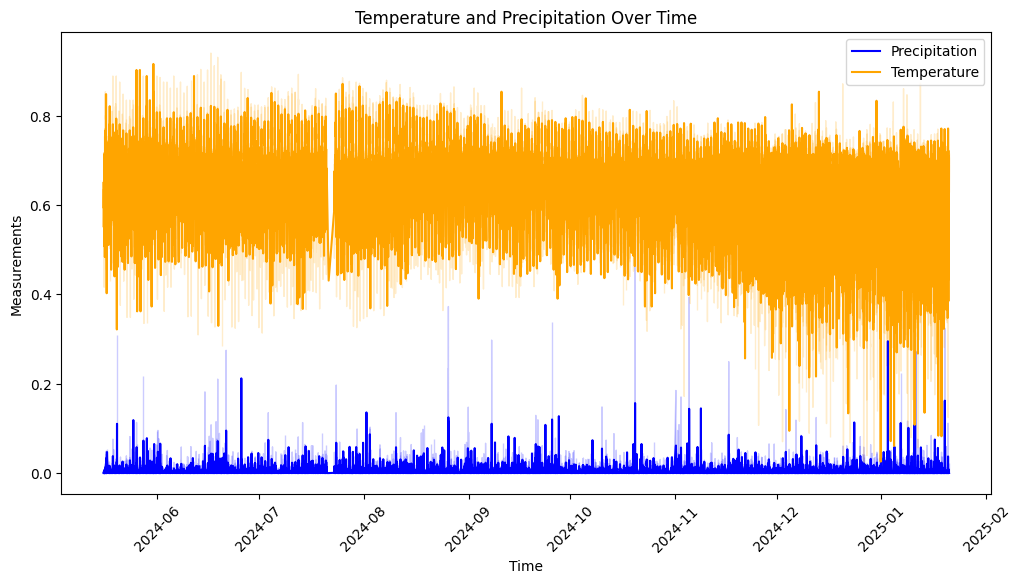

In [35]:
visualize(df)

# covert our categorical features into numerical 

In [36]:
def cat_to_num(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df_encoded = df.copy()
    for col in categorical_cols:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    return df_encoded

In [37]:
df=cat_to_num(df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       48331 non-null  int16         
 1   location_name                 48331 non-null  int16         
 2   latitude                      48331 non-null  float64       
 3   longitude                     48331 non-null  float64       
 4   timezone                      48331 non-null  int16         
 5   last_updated_epoch            48331 non-null  float64       
 6   last_updated                  48331 non-null  datetime64[ns]
 7   temperature_celsius           48331 non-null  float64       
 8   condition_text                48331 non-null  int8          
 9   wind_kph                      48331 non-null  float64       
 10  wind_degree                   48331 non-null  float64       
 11  wind_direction              

In [39]:
df.head()

country  location_name  latitude  longitude  timezone  last_updated_epoch  \
0        0             98  0.719014   0.689521       104                 0.0   
1        1            225  0.783594   0.550251       166                 0.0   
2        2             11  0.740256   0.502934         2                 0.0   
3        3             14  0.794689   0.498617       133                 0.0   
4        4            122  0.307824   0.531657        27                 0.0   

         last_updated  temperature_celsius  condition_text  wind_kph  ...  \
0 2024-05-16 13:15:00             0.694595              29  0.003277  ...   
1 2024-05-16 10:45:00             0.591892              30  0.002568  ...   
2 2024-05-16 09:45:00             0.645946              40  0.003886  ...   
3 2024-05-16 10:45:00             0.420270              10  0.002804  ...   
4 2024-05-16 09:45:00             0.686486              30  0.003176  ...   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                      0.002572                     0.950464   
1                      0.002104                     0.950455   
2                      0.152209                     0.951719   
3                      0.003741                     0.950464   
4                      0.169979                     0.953440   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0           0.005090          0.004509                       0.0   
1           0.000567          0.000310                       0.0   
2           0.006329          0.003110                       0.0   
3           0.000319          0.000122                       0.0   
4           0.113522          0.044746                       0.8   

   air_quality_gb-defra-index  moon_phase  moon_illumination  daytime_hours  \
0                         0.0           7               0.55       0.572004   
1                         0.0           7               0.55       0.605237   
2                         0.0           7               0.55       0.582075   
3                         0.0           7               0.55       0.612286   
4                         1.0           7               0.55       0.434038   

   nighttime_hours  
0         0.574908  
1         0.587454  
2         0.574908  
3         0.589668  
4         0.502583  

[5 rows x 32 columns]

In [40]:
df.describe().T

count                           mean  \
country                       48331.0                     100.818253   
location_name                 48331.0                     124.840289   
latitude                      48331.0                        0.57318   
longitude                     48331.0                       0.556986   
timezone                      48331.0                      96.200223   
last_updated_epoch            48331.0                       0.500316   
last_updated                    48331  2024-09-18 02:12:16.595559680   
temperature_celsius           48331.0                       0.647194   
condition_text                48331.0                      30.433324   
wind_kph                      48331.0                       0.003292   
wind_degree                   48331.0                        0.47367   
wind_direction                48331.0                       6.982247   
pressure_mb                   48331.0                       0.392027   
precip_mm                     48331.0                       0.003458   
humidity                      48331.0                       0.624383   
cloud                         48331.0                       0.400382   
feels_like_celsius            48331.0                       0.675982   
visibility_km                 48331.0                       0.300945   
uv_index                      48331.0                       0.265597   
gust_kph                      48331.0                        0.00529   
air_quality_Carbon_Monoxide   48331.0                       0.215115   
air_quality_Ozone             48331.0                       0.130611   
air_quality_Nitrogen_dioxide  48331.0                       0.032602   
air_quality_Sulphur_dioxide   48331.0                       0.951447   
air_quality_PM2.5             48331.0                       0.014392   
air_quality_PM10              48331.0                        0.00783   
air_quality_us-epa-index      48331.0                       0.129163   
air_quality_gb-defra-index    48331.0                       0.166711   
moon_phase                    48331.0                       4.984523   
moon_illumination             48331.0                       0.497425   
daytime_hours                 48331.0                       0.462375   
nighttime_hours               48331.0                       0.494628   

                                              min                  25%  \
country                                       0.0                 47.0   
location_name                                 0.0                 61.0   
latitude                                      0.0             0.427217   
longitude                                     0.0             0.476694   
timezone                                      0.0                 46.0   
last_updated_epoch                            0.0             0.245536   
last_updated                  2024-05-16 01:45:00  2024-07-16 14:45:00   
temperature_celsius                           0.0             0.582432   
condition_text                                0.0                 29.0   
wind_kph                                      0.0              0.00098   
wind_degree                                   0.0             0.227019   
wind_direction                                0.0                  3.0   
pressure_mb                                   0.0             0.357798   
precip_mm                                     0.0                  0.0   
humidity                                      0.0             0.438776   
cloud                                         0.0                 0.04   
feels_like_celsius                            0.0             0.605516   
visibility_km                                 0.0               0.3125   
uv_index                                      0.0             0.062112   
gust_kph                                      0.0             0.002427   
air_quality_Carbon_Monoxide                   0.0             0.209035   
air_quality_Ozone          

on Kaggle our code took 13 min to run till now with no accelerator

now our data is ready to me put into our model

# Forecasting model 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
target_columns = ['temperature_celsius', 'pressure_mb', 'humidity']
df.drop(['last_updated'],inplace=True,axis=1) # as we cant deal with datetime data type variables
X = df.drop(columns=target_columns)
y = df[target_columns]

# Align features and target
X, y = X.align(y, join='inner', axis=0)
    
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

## linear regression model 

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
    
# Make predictions
y_pred = model.predict(X_test)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Model Performance for {target_columns}:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Performance for ['temperature_celsius', 'pressure_mb', 'humidity']:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2): 0.64


## lets try my favourite model **random forest**

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
    
# Make predictions
y_pred = model.predict(X_test)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Model Performance for {target_columns}:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Performance for ['temperature_celsius', 'pressure_mb', 'humidity']:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
R-squared (R2): 0.87


increasing number of estimators was no good for the accuracy and gave the same results

lets try more complex random forest and optimise hyperparameters by **GridSearchCV**

In [45]:
"""
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [10, 20, 30, None],     # Tree depth
    'min_samples_split': [2, 5, 10],     # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Min samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # Use all available CPU cores
    verbose=2,               # Detailed logging
    scoring='neg_mean_squared_error'  # Optimize for MSE
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid for tuning\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],      # Number of trees\n    \'max_depth\': [10, 20, 30, None],     # Tree depth\n    \'min_samples_split\': [2, 5, 10],     # Min samples to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],       # Min samples at a leaf node\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']  # Number of features to consider at each split\n}\n\n# Initialize the Random Forest Regressor\nmodel = RandomForestRegressor(random_state=42)\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    cv=5,                    # 5-fold cross-validation\n    n_jobs=-1,               # Use all available CPU cores\n    verbose=2,               # Detailed logging\n    scoring=\'neg_mean_squared_error\'  # Optimize for MSE\n)\n\n# Fit GridSearchCV to the training data\ngrid_search.fit(X_train, y_train)\n\n# G

In [46]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,       # Number of trees
    max_depth=10,           # Tree depth
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Subsample ratio of training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


📊 XGBoost Model Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
R-squared (R²): 0.91


In [47]:
"""
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
"""

'\nfrom xgboost import XGBRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 300, 500],\n    \'max_depth\': [3, 5, 7],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'gamma\': [0, 0.1, 0.3]\n}\n\nxgb_model = XGBRegressor(random_state=42)\ngrid_search = GridSearchCV(\n    estimator=xgb_model,\n    param_grid=param_grid,\n    scoring=\'r2\',\n    cv=5,\n    n_jobs=-1,\n    verbose=2\n)\n\ngrid_search.fit(X_train, y_train)\nprint("Best Parameters:", grid_search.best_params_)\n'

## try LightGBM

In [48]:
!pip install lightgbm

In [49]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb

# Initialize LightGBM with MultiOutputRegressor
multi_target_model = MultiOutputRegressor(
    lgb.LGBMRegressor(
        n_estimators=200,
        max_depth=20,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
)

# Fit the model
multi_target_model.fit(X_train, y_train)

# Predict
y_pred = multi_target_model.predict(X_test)

# Evaluate each target
for idx, col in enumerate(y_train.columns):
    mse = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx])
    mae = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    r2 = r2_score(y_test.iloc[:, idx], y_pred[:, idx])

    print(f"📊 Performance for {col}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}\n")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5004
[LightGBM] [Info] Number of data points in the train set: 38664, number of used features: 28
[LightGBM] [Info] Start training from score 0.647567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5004
[LightGBM] [Info] Number of data points in the train set: 38664, number of used features: 28
[LightGBM] [Info] Start training from score 0.391858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5004
[LightGBM] [Info] Number of data points in the train set

so for now we can focus on precip_mm to enhance model accuracy

we removed precip_mm as a target to predict as our data was heavly inbalanced objective=

now we will put our focus into pressure to enhance our model 

# notes

on dealing with precipitate as one of the targets, Removing outliers , best R2 score was *0.77* on **XGBoost** 

on having only temperature, pressure_mb, humidity as our targets and leave our data as it is without handling outliers, resulted got improved a lot as precipitate data we have is extremly inbalanced 
best result we got till now was R2 score of *0.91* on **XGBoost**

# Time series analysis

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  int16  
 1   location_name                 48331 non-null  int16  
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  int16  
 5   last_updated_epoch            48331 non-null  float64
 6   temperature_celsius           48331 non-null  float64
 7   condition_text                48331 non-null  int8   
 8   wind_kph                      48331 non-null  float64
 9   wind_degree                   48331 non-null  float64
 10  wind_direction                48331 non-null  int8   
 11  pressure_mb                   48331 non-null  float64
 12  precip_mm                     48331 non-null  float64
 13  h

In [51]:
GlobalWeatherRepository.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  int64  
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   condition_text                48331 non-null  object 
 9   wind_kph                      48331 non-null  float64
 10  wind_degree                   48331 non-null  int64  
 11  wind_direction                48331 non-null  object 
 12  pressure_mb                   48331 non-null  float64
 13  p

we deleted last updated column on our model so need to restore it back

now we can add last updated column back to our data set 

In [52]:
df['last_updated']=GlobalWeatherRepository['last_updated']
df['last_updated']=pd.to_datetime(df['last_updated'])
df.set_index('last_updated', inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48331 entries, 2024-05-16 13:15:00 to 2025-01-20 12:30:00
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  int16  
 1   location_name                 48331 non-null  int16  
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  int16  
 5   last_updated_epoch            48331 non-null  float64
 6   temperature_celsius           48331 non-null  float64
 7   condition_text                48331 non-null  int8   
 8   wind_kph                      48331 non-null  float64
 9   wind_degree                   48331 non-null  float64
 10  wind_direction                48331 non-null  int8   
 11  pressure_mb                   48331 non-null  float64
 12  precip_mm                

as our data set is updated daily we will need to have a daily dataset to train our model

In [54]:
df_daily = df.resample('D').mean().interpolate()  # Interpolate missing values

In [55]:
df_daily.head()

country  location_name  latitude  longitude   timezone  \
last_updated                                                              
2024-05-16     99.089947     125.291005  0.583596   0.547596  93.814815   
2024-05-17     98.357143     124.983516  0.572665   0.537920  95.560440   
2024-05-18    100.760976     126.834146  0.574510   0.568913  97.585366   
2024-05-19    100.479381     126.257732  0.576422   0.553573  96.257732   
2024-05-20    100.005128     125.902564  0.573759   0.555429  96.435897   

              last_updated_epoch  temperature_celsius  condition_text  \
last_updated                                                            
2024-05-16              0.000431             0.656313       30.685185   
2024-05-17              0.004949             0.665563       26.423077   
2024-05-18              0.008569             0.677779       30.200000   
2024-05-19              0.012718             0.676623       31.304124   
2024-05-20              0.016805             0.678794       29.835897   

              wind_kph  wind_degree  ...  air_quality_Nitrogen_dioxide  \
last_updated                         ...                                 
2024-05-16    0.003746     0.445203  ...                      0.026236   
2024-05-17    0.003510     0.472834  ...                      0.029442   
2024-05-18    0.003296     0.470711  ...                      0.022426   
2024-05-19    0.003426     0.464233  ...                      0.017778   
2024-05-20    0.003687     0.483408  ...                      0.027007   

              air_quality_Sulphur_dioxide  air_quality_PM2.5  \
last_updated                                                   
2024-05-16                       0.951225           0.011483   
2024-05-17                       0.951095           0.010625   
2024-05-18                       0.950999           0.010651   
2024-05-19                       0.950907           0.008846   
2024-05-20                       0.951230           0.011673   

              air_quality_PM10  air_quality_us-epa-index  \
last_updated                                               
2024-05-16            0.005635                  0.084127   
2024-05-17            0.005526                  0.070330   
2024-05-18            0.005673                  0.072195   
2024-05-19            0.005105                  0.064948   
2024-05-20            0.006165                  0.091282   

              air_quality_gb-defra-index  moon_phase  moon_illumination  \
last_updated                                                              
2024-05-16                      0.104056         7.0           0.550000   
2024-05-17                      0.090354         7.0           0.634066   
2024-05-18                      0.093767         7.0           0.719902   
2024-05-19                      0.076174         7.0           0.805464   
2024-05-20                      0.112821         7.0           0.875692   

              daytime_hours  nighttime_hours  
last_updated                                  
2024-05-16         0.535140         0.543630  
2024-05-17         0.532701         0.527777  
2024-05-18         0.533461         0.521714  
2024-05-19         0.535449         0.505314  
2024-05-20         0.535394         0.489420  

[5 rows x 31 columns]

In [56]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-05-16 to 2025-01-20
Freq: D
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       250 non-null    float64
 1   location_name                 250 non-null    float64
 2   latitude                      250 non-null    float64
 3   longitude                     250 non-null    float64
 4   timezone                      250 non-null    float64
 5   last_updated_epoch            250 non-null    float64
 6   temperature_celsius           250 non-null    float64
 7   condition_text                250 non-null    float64
 8   wind_kph                      250 non-null    float64
 9   wind_degree                   250 non-null    float64
 10  wind_direction                250 non-null    float64
 11  pressure_mb                   250 non-null    float64
 12  precip_mm                     250 non

now lets make another XGBoost model for our time series analysis

at first we need to split our new data set 

In [57]:
target_columns = ['temperature_celsius', 'pressure_mb', 'humidity']
X = df_daily.drop(columns=target_columns)
y = df_daily[target_columns]

# Align features and target
X, y = X.align(y, join='inner', axis=0)
    
# Define a split date
split_date = '2024-12-01'  

# Create training and testing sets
X_train = X.loc[:split_date]
X_test = X.loc[split_date:]
y_train = y.loc[:split_date]
y_test = y.loc[split_date:]

In [58]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (200, 28), y_train shape: (200, 3)
X_test shape: (51, 28), y_test shape: (51, 3)


In [59]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,       # Number of trees
    max_depth=10,           # Tree depth
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Subsample ratio of training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


📊 XGBoost Model Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01
R-squared (R²): -1.36


I wouldnt expect a better results since we have only 249 column

lets try hourly resampled data frame

In [60]:
df_hourly = df.resample('H').mean().interpolate()  # Interpolate missing values

<ipython-input-60-7d9ac205e653>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean().interpolate()  # Interpolate missing values


In [61]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2024-05-16 01:00:00 to 2025-01-20 23:00:00
Freq: h
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       5999 non-null   float64
 1   location_name                 5999 non-null   float64
 2   latitude                      5999 non-null   float64
 3   longitude                     5999 non-null   float64
 4   timezone                      5999 non-null   float64
 5   last_updated_epoch            5999 non-null   float64
 6   temperature_celsius           5999 non-null   float64
 7   condition_text                5999 non-null   float64
 8   wind_kph                      5999 non-null   float64
 9   wind_degree                   5999 non-null   float64
 10  wind_direction                5999 non-null   float64
 11  pressure_mb                   5999 non-null   float64
 12  precip_mm         

In [62]:
target_columns = ['temperature_celsius', 'pressure_mb', 'humidity']
X = df_hourly.drop(columns=target_columns)
y = df_hourly[target_columns]

# Align features and target
X, y = X.align(y, join='inner', axis=0)
    
# Define a split date
split_date = '2024-12-01'  

# Create training and testing sets
X_train = X.loc[:split_date]
X_test = X.loc[split_date:]
y_train = y.loc[:split_date]
y_test = y.loc[split_date:]

In [63]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4799, 28), y_train shape: (4799, 3)
X_test shape: (1224, 28), y_test shape: (1224, 3)


In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,       # Number of trees
    max_depth=10,           # Tree depth
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Subsample ratio of training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


📊 XGBoost Model Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
R-squared (R²): 0.72


now we have a better results for Temp , Pressure and humidity per hour 

lets try SVM as we have a small data set 

In [65]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the SVR model
svr_model = SVR(
    kernel='rbf',       
    C=1.0,              
    epsilon=0.1         
)

# Train the model
svr_model.fit(X_train, y_train['temperature_celsius'])  # Train on one target at a time

# Make predictions
y_pred_temp = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['temperature_celsius'], y_pred_temp)
mae = mean_absolute_error(y_test['temperature_celsius'], y_pred_temp)
r2 = r2_score(y_test['temperature_celsius'], y_pred_temp)

print("📊 SVM (SVR) Model Performance for Temperature:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


📊 SVM (SVR) Model Performance for Temperature:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R²): 0.01


In [66]:
# Train SVR for each target variable
models = {}
predictions = {}
results = {}

for target in target_columns:
    # Initialize SVR
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    
    # Train model on each target
    svr_model.fit(X_train, y_train[target])
    
    # Store the model
    models[target] = svr_model
    
    # Predict
    predictions[target] = svr_model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test[target], predictions[target])
    mae = mean_absolute_error(y_test[target], predictions[target])
    r2 = r2_score(y_test[target], predictions[target])
    
    # Save evaluation metrics
    results[target] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print results
for target, metrics in results.items():
    print(f"📊 SVM (SVR) Model Performance for {target}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"R-squared (R²): {metrics['R2']:.2f}")
    print()


📊 SVM (SVR) Model Performance for temperature_celsius:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R²): 0.01

📊 SVM (SVR) Model Performance for pressure_mb:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.04
R-squared (R²): -0.23

📊 SVM (SVR) Model Performance for humidity:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.07
R-squared (R²): 0.60



In [67]:
"""
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train['temperature_celsius'])

print("Best Parameters:", grid_search.best_params_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'epsilon\': [0.01, 0.1, 1],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\']\n}\n\ngrid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring=\'r2\')\ngrid_search.fit(X_train, y_train[\'temperature_celsius\'])\n\nprint("Best Parameters:", grid_search.best_params_)\n'

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'} to Forecast temperature

In [68]:
# Train SVR for each target variable
models = {}
predictions = {}
results = {}

for target in target_columns:
    # Initialize SVR
    svr_model = SVR(kernel='linear', C=0.1, epsilon=0.01)
    
    # Train model on each target
    svr_model.fit(X_train, y_train[target])
    
    # Store the model
    models[target] = svr_model
    
    # Predict
    predictions[target] = svr_model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test[target], predictions[target])
    mae = mean_absolute_error(y_test[target], predictions[target])
    r2 = r2_score(y_test[target], predictions[target])
    
    # Save evaluation metrics
    results[target] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print results
for target, metrics in results.items():
    print(f"📊 SVM (SVR) Model Performance for {target}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"R-squared (R²): {metrics['R2']:.2f}")
    print()


📊 SVM (SVR) Model Performance for temperature_celsius:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01
R-squared (R²): 0.98

📊 SVM (SVR) Model Performance for pressure_mb:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.02
R-squared (R²): 0.35

📊 SVM (SVR) Model Performance for humidity:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R²): 0.73



we will try gridSearchCV to get best result for Pressure and Humidity as well 

In [69]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'] 
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train['pressure_mb'])

print("Best Parameters:", grid_search.best_params_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'epsilon\': [0.01, 0.1, 1],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'] \n}\n\ngrid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring=\'r2\', n_jobs=-1)\ngrid_search.fit(X_train, y_train[\'pressure_mb\'])\n\nprint("Best Parameters:", grid_search.best_params_)\n'

kaggle couldn't run this GridSearchCV 

we can use our Temp SVR model as our model for now

## visuals for Temp and precipitate

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### daily visualization 

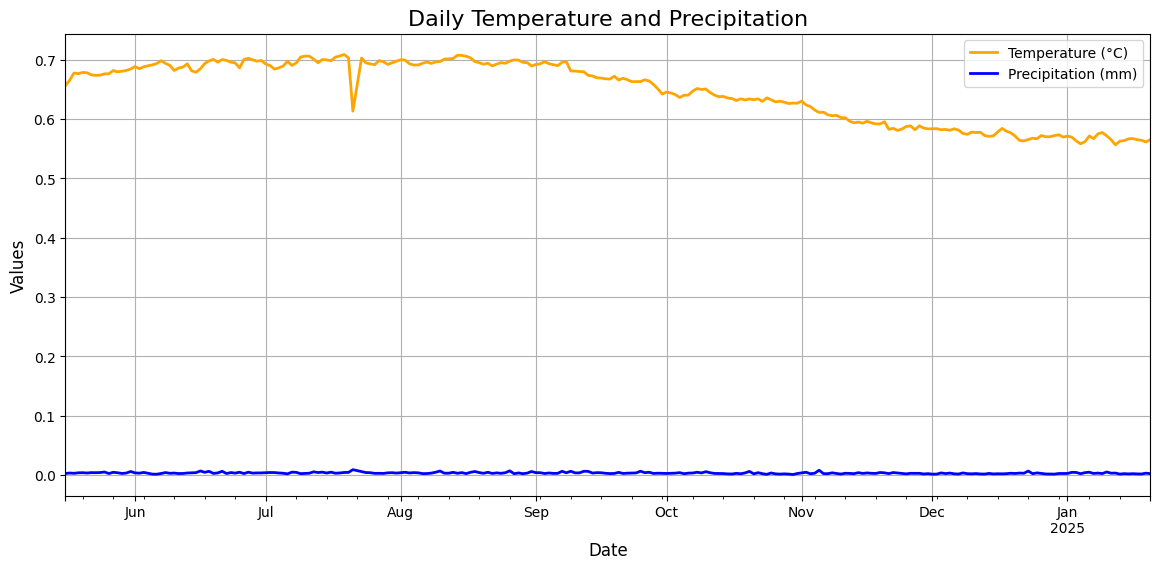

In [71]:
df_daily_avg = df_daily[['temperature_celsius', 'precip_mm']].resample('D').mean()

plt.figure(figsize=(14, 6))
df_daily_avg['temperature_celsius'].plot(label='Temperature (°C)', color='orange', linewidth=2)
df_daily_avg['precip_mm'].plot(label='Precipitation (mm)', color='blue', linewidth=2)
plt.title('Daily Temperature and Precipitation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()
plt.show()


### weekly visualization 

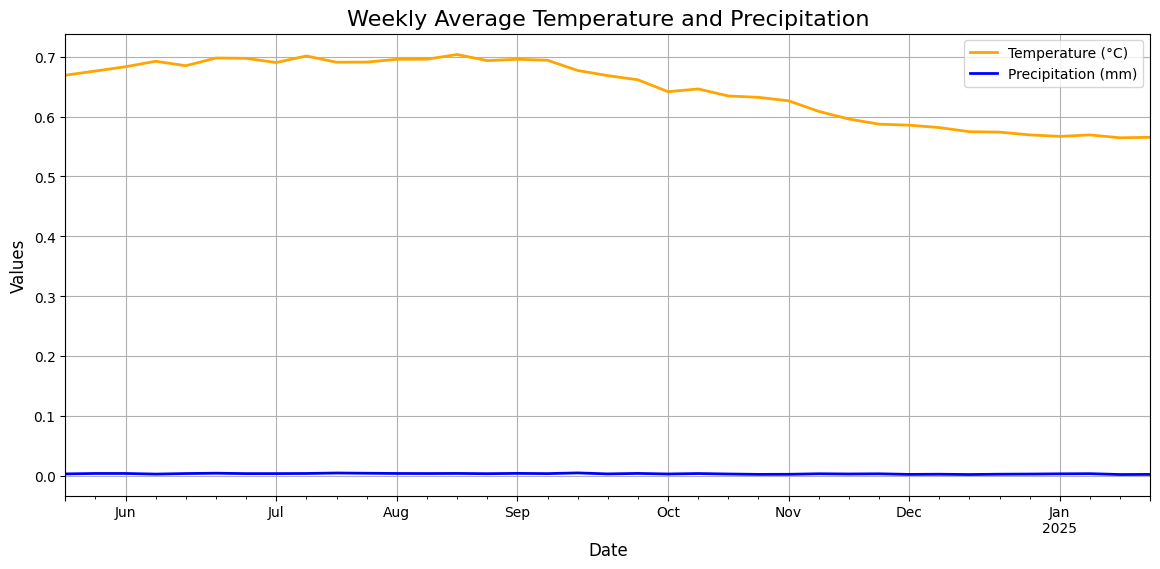

In [72]:
df_weekly_avg = df_daily[['temperature_celsius', 'precip_mm']].resample('W').mean()

plt.figure(figsize=(14, 6))
df_weekly_avg['temperature_celsius'].plot(label='Temperature (°C)', color='orange', linewidth=2)
df_weekly_avg['precip_mm'].plot(label='Precipitation (mm)', color='blue', linewidth=2)
plt.title('Weekly Average Temperature and Precipitation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()
plt.show()


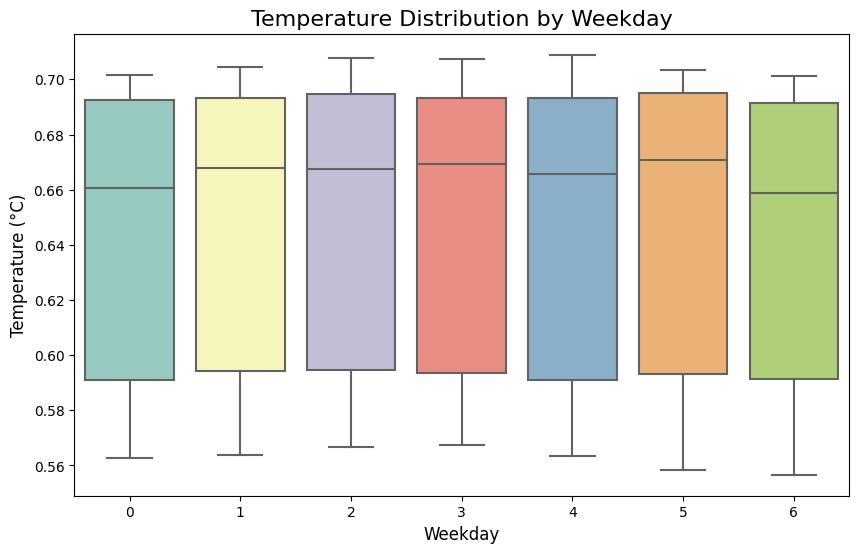

In [73]:
df_daily['weekday'] = df_daily.index.weekday  # Add weekday column (0=Monday, 6=Sunday)

plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='temperature_celsius', data=df_daily.reset_index(), palette='Set3')
plt.title('Temperature Distribution by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.show()


### Monthly Visualization

<ipython-input-74-86a1af461784>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df_daily[['temperature_celsius', 'precip_mm']].resample('M').mean()


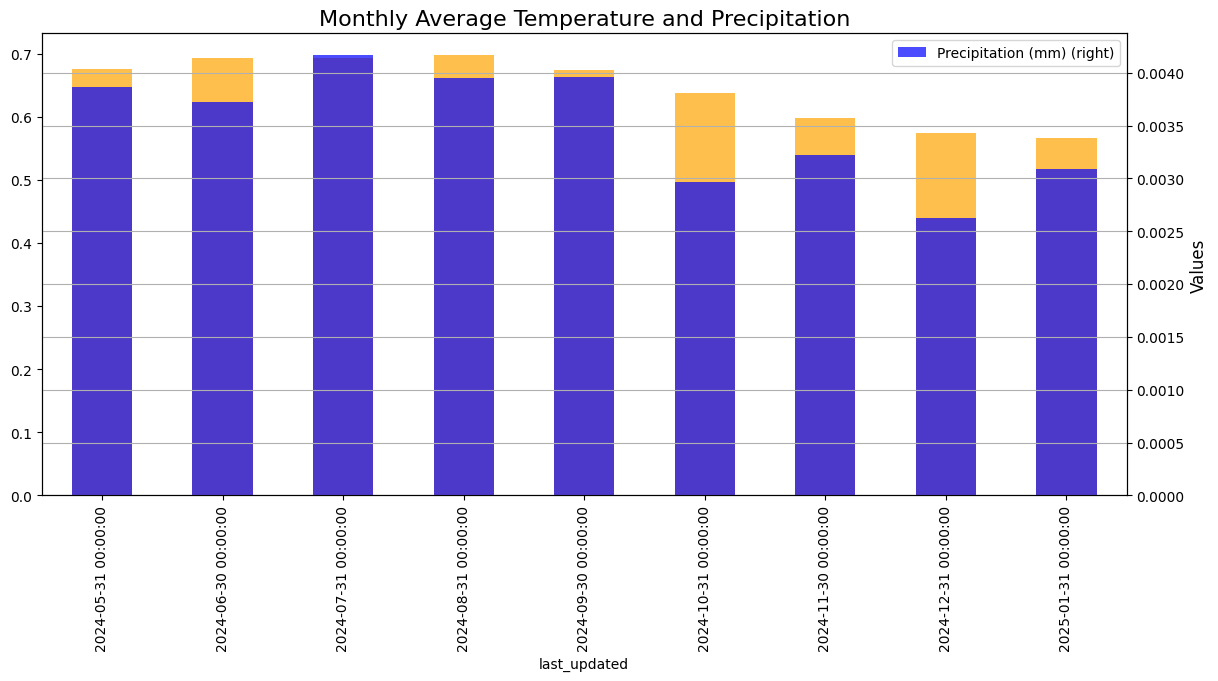

In [74]:
df_monthly_avg = df_daily[['temperature_celsius', 'precip_mm']].resample('M').mean()

plt.figure(figsize=(14, 6))
df_monthly_avg['temperature_celsius'].plot(kind='bar', label='Temperature (°C)', color='orange', alpha=0.7)
df_monthly_avg['precip_mm'].plot(kind='bar', label='Precipitation (mm)', color='blue', alpha=0.7, secondary_y=True)
plt.title('Monthly Average Temperature and Precipitation', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()
plt.show()


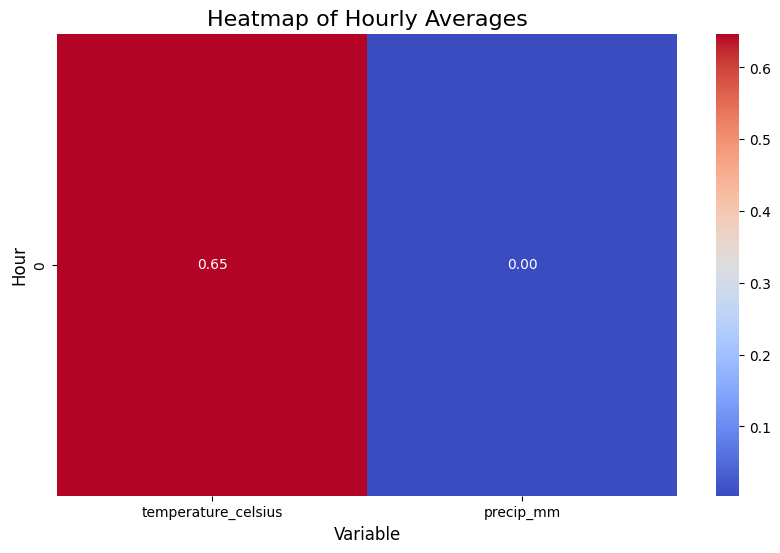

In [76]:
hourly_avg = df_daily[['temperature_celsius', 'precip_mm']].groupby(df_daily.index.hour).mean()

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_avg, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Hourly Averages', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Hour', fontsize=12)
plt.show()


finally

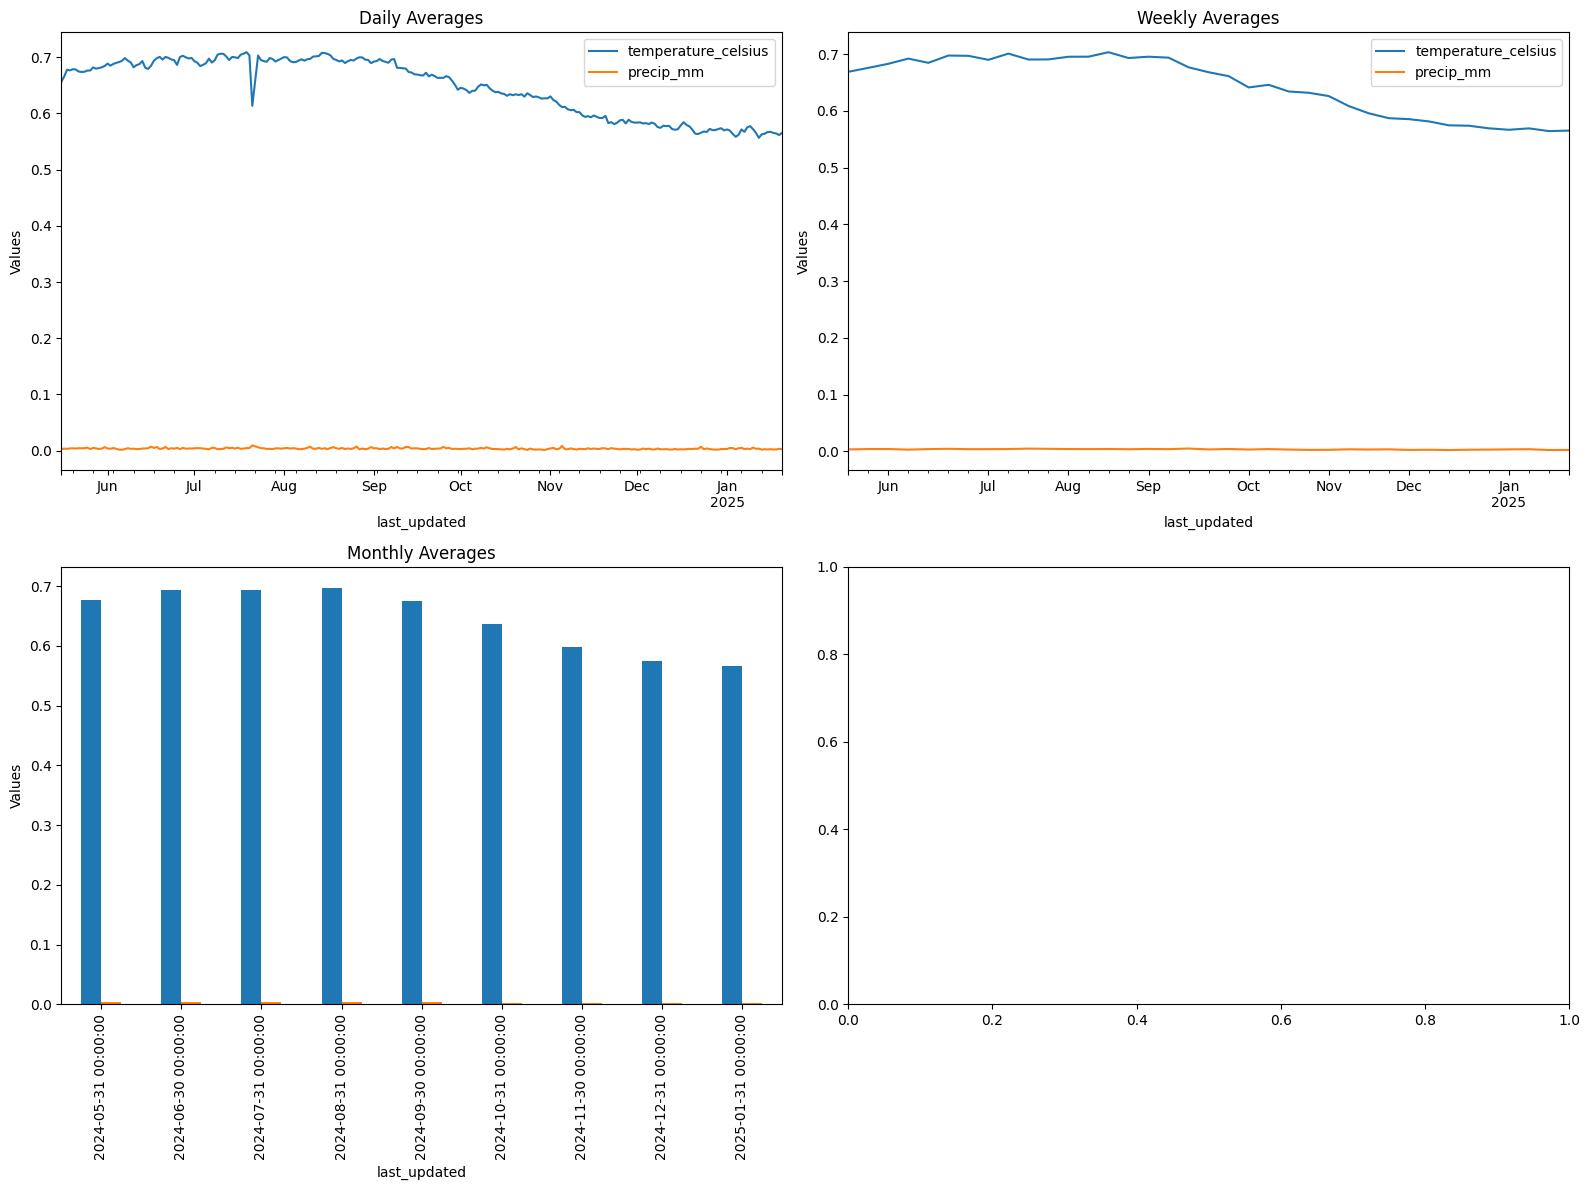

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Daily
df_daily_avg.plot(ax=axes[0, 0], title='Daily Averages')
axes[0, 0].set_ylabel('Values')

# Weekly
df_weekly_avg.plot(ax=axes[0, 1], title='Weekly Averages')
axes[0, 1].set_ylabel('Values')

# Monthly
df_monthly_avg.plot(kind='bar', ax=axes[1, 0], title='Monthly Averages', legend=False)
axes[1, 0].set_ylabel('Values')

plt.tight_layout()
plt.show()


Final runtime on kaggle took **25 min**  while running with no accelerator